In [21]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection   import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score,precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

%matplotlib inline

In [22]:
os.chdir("/home/aditya/code_pen/edwiser/project 2/python")

In [23]:
#Loading test train data
train = pd.read_csv("train.csv")
test =pd.read_csv("test.csv")

In [24]:
#checking head of train data 
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [25]:
#checking head of test data 
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [26]:
print("Train info")
print(train.info() ,end='\n\n')
print("Train Dim  :",train.shape ,end='\n\n')
print("Test info ",end='\n')
print(test.info(),end='\n\n')
print("Test Dim  :",test.shape)

Train info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
None

Train Dim  : (200000, 202)

Test info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB
None

Test Dim  : (200000, 201)


In [27]:
#data types in train dataset
train.dtypes.value_counts()

float64    200
int64        1
object       1
dtype: int64

In [28]:
#data types in test dataset
test.dtypes.value_counts()

float64    200
object       1
dtype: int64

In [29]:
#check Descriptive stats of train data 
train.describe()
#mean and median of most of the data is same 

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


# Observation 
1. Mean and median of most of the data set are almost same 

In [31]:
#storing ID_code  of test tarin data 
train_ID_code_orignal = train.ID_code
test_Id_code_orignal  = test.ID_code

In [32]:
#droping ID_code in train
train.drop(columns="ID_code" ,inplace =True )
print(train.shape)

(200000, 201)


In [33]:
#droping ID_code in test
test.drop(columns="ID_code" ,inplace =True )
print(test.shape)

(200000, 200)


# Checking distribution of target variable

In [34]:
#This function takes series as input and plot bar and pie chart

def plot_target_class(var):
    
    plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.title("Count of each target class")
    sns.countplot(x = var)

    plt.subplot(222)
    plt.pie(var.value_counts() , labels=[0,1] ,autopct='%1.2f%%' ,explode=(0,1) ,shadow=True)
    plt.legend(['class 0','class 1'])
    plt.title("Percentage of class in taget var")
    plt.show()

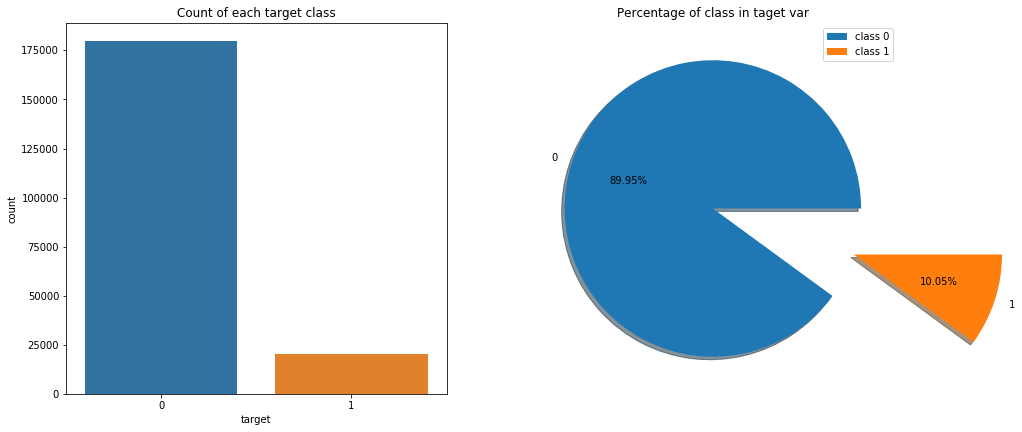

In [35]:
#ploting count plot of target varaible
plot_target_class(train.target)

# Observations
1. There is high imbalance between classes in taget class 
2. The number of observations in class 0 is more the class 1 (90% class 0 ,10% class 1)
3. The number of people that will not make transaction is more than the one who will make 

# Missing value analysis 

In [36]:
def calculate_missing_values(df):
    """ this function takes dataframe as input and calculate missing value count in each variable
        return a dataframe with missing value count per column in decending order 
    """
    missing_value_df =pd.DataFrame(df.isnull().sum())
    missing_value_df.rename(columns={0 :'count'} ,inplace=True)
    missing_value_df.sort_values(by='count',ascending=False)
    return missing_value_df

In [37]:
# missing value for train and test
print("Train dataframe",calculate_missing_values(train).head(10),sep='\n')
print("Test dataframe",calculate_missing_values(test).head(10),sep='\n')

Train dataframe
        count
target      0
var_0       0
var_1       0
var_2       0
var_3       0
var_4       0
var_5       0
var_6       0
var_7       0
var_8       0
Test dataframe
       count
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0


* No missing values in both test and train data 

# Independent dependent variable split 

In [38]:
#removing target variable from train dataset as it is not needed for vif calculation 
# creating target and independent variable from train dataset 
independent_var= [i for i in train.columns.values if i!='target']
X = train[independent_var]
Y =train.target


# Multicolinearity  Analysis

In [39]:

def calulate_vif(df,column_name ):
    # This function take dataframe and columns name and then calculate vif score 
    #taking one var as taget and rest as independent and then running OLS 
    #to calculate r^2 score and then vif using formula =1/(1-r^2)
    #return a dict {colname:vif}
    
    vif_score ={}
    for i in range(0 , df.shape[1]):
        print(i,end="\n")
        Y =df.loc[: , df.columns==column_name[i]]
        X =df.drop(columns=column_name[i])
        model =LinearRegression().fit(X,Y)
        rsq=model.score(X,Y)
        vif =round(((1)/(1-rsq)) ,2)
        print("vif score:",vif,end="\n")
        vif_score[independent_var[i]]=vif
    
    return vif_score


In [40]:
# calculating vif 
vif_dict=calulate_vif(X ,independent_var)

0
vif score: 1.0
1
vif score: 1.0
2
vif score: 1.0
3
vif score: 1.0
4
vif score: 1.0
5
vif score: 1.0
6
vif score: 1.0
7
vif score: 1.0
8
vif score: 1.0
9
vif score: 1.0
10
vif score: 1.0
11
vif score: 1.0
12
vif score: 1.0
13
vif score: 1.0
14
vif score: 1.0
15
vif score: 1.0
16
vif score: 1.0
17
vif score: 1.0
18
vif score: 1.0
19
vif score: 1.0
20
vif score: 1.0
21
vif score: 1.0
22
vif score: 1.0
23
vif score: 1.0
24
vif score: 1.0
25
vif score: 1.0
26
vif score: 1.0
27
vif score: 1.0
28
vif score: 1.0
29
vif score: 1.0
30
vif score: 1.0
31
vif score: 1.0
32
vif score: 1.0
33
vif score: 1.0
34
vif score: 1.0
35
vif score: 1.0
36
vif score: 1.0
37
vif score: 1.0
38
vif score: 1.0
39
vif score: 1.0
40
vif score: 1.0
41
vif score: 1.0
42
vif score: 1.0
43
vif score: 1.0
44
vif score: 1.0
45
vif score: 1.0
46
vif score: 1.0
47
vif score: 1.0
48
vif score: 1.0
49
vif score: 1.0
50
vif score: 1.0
51
vif score: 1.0
52
vif score: 1.0
53
vif score: 1.0
54
vif score: 1.0
55
vif score: 1.0
56

In [41]:
# writing values of vif in dataframe
vif_df=pd.DataFrame(list(vif_dict.values()) ,index=list(vif_dict.keys()) )
vif_df.reset_index(inplace=True)
vif_df.rename(columns={0:"vif" ,'index':"var"} ,inplace=True)



In [42]:
vif_df.head()

,var,vif
0,var_0,1.0
1,var_1,1.0
2,var_2,1.0
3,var_3,1.0
4,var_4,1.0


# Observation Multicolinearity
1. Vif of all variable is close to 1 thats strange 

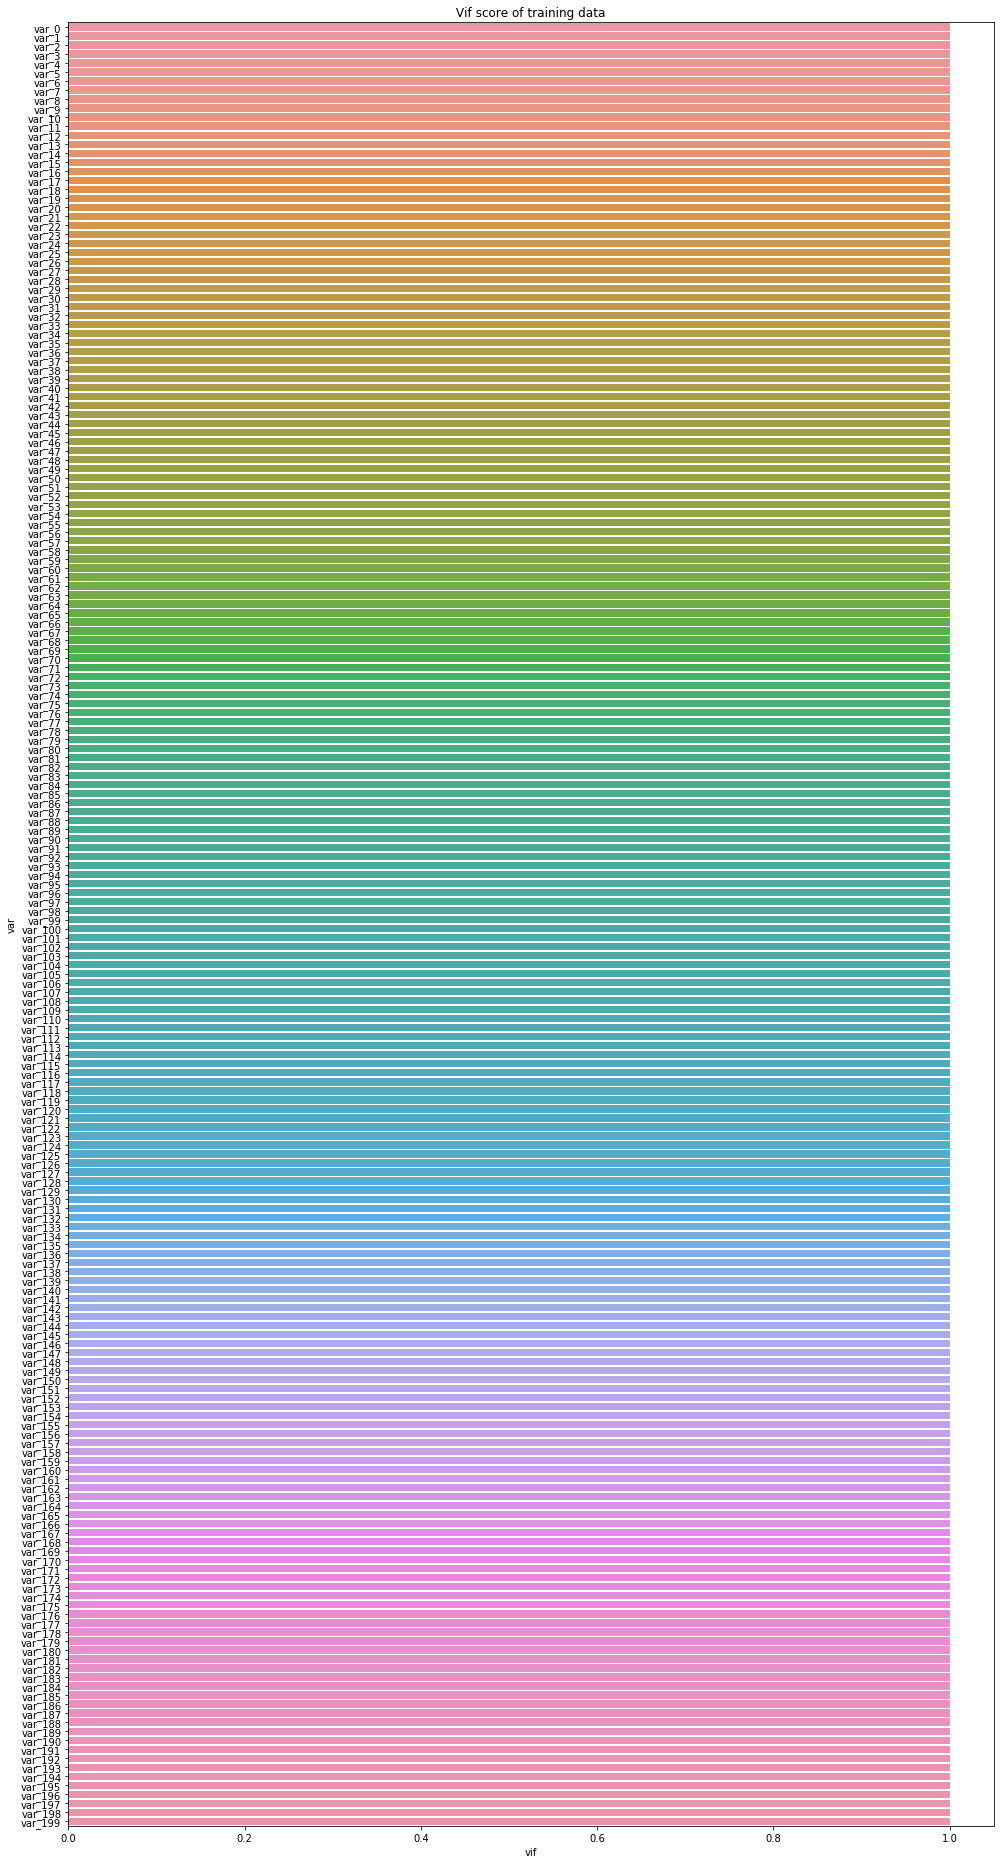

In [43]:

# This function Plot barplot with respect to varible name and its correponding vif score 

def plot_vif(df):
    plt.figure(figsize=(14,26))
    sns.barplot(y='var',x ='vif' ,data =vif_df )
    plt.title(" Vif score of training data ")
    plt.tight_layout()
    plt.show()

    
    
    
#vif plot for training data 
plot_vif(vif_df)

In [44]:
#This function pair plots train by subseting dataframe based on start and end index passed
#X =independent Var 
#Y =dependent Var 
#start =start index
#end =end index  
   
def check_distribution(X ,start ,end):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    names =list(range(start,end))
    if((end>start )and (end-start <=20) and (end>=1 and start<200 )):
        for i , realindex in  enumerate(names,1):
            ax = fig.add_subplot( 5,4, i)
            sns.distplot(X.iloc[:,realindex] ,ax=ax)
        plt.suptitle("Distribution plot ")
        plt.show()
   
    else:
        print("Check index start index should be less end index")
        print("Max 20 plot can be printed ")
        print("Start and end index range is (0-200)")  
       


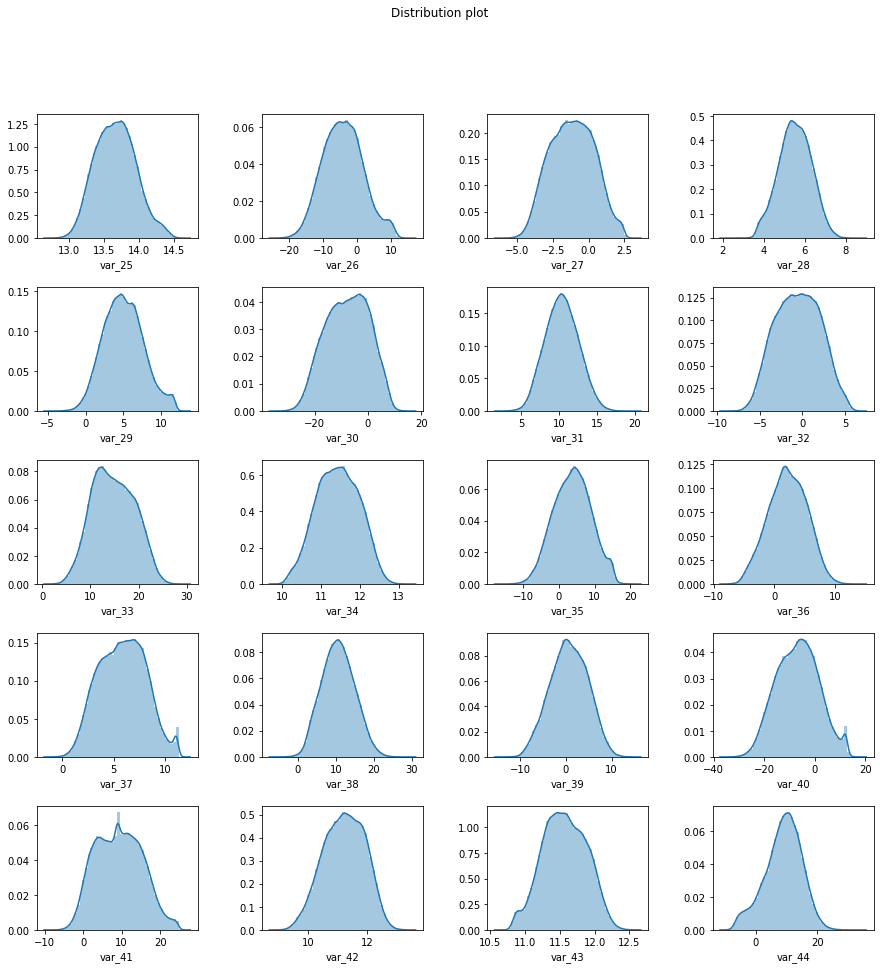

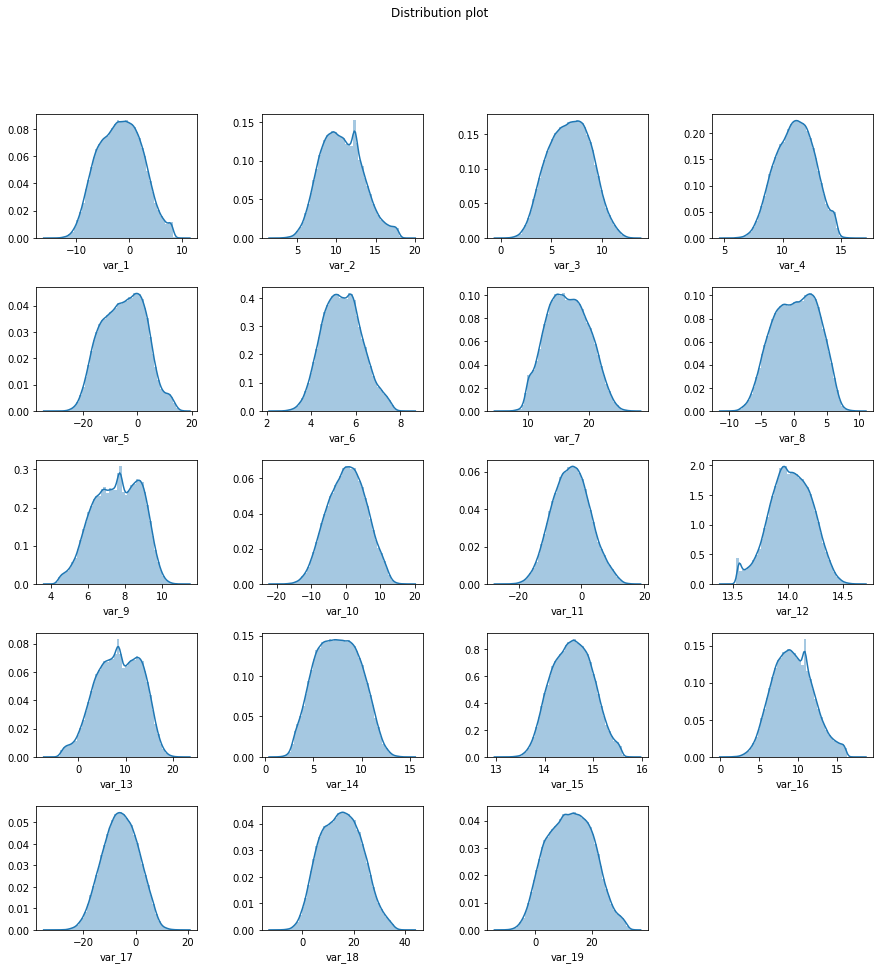

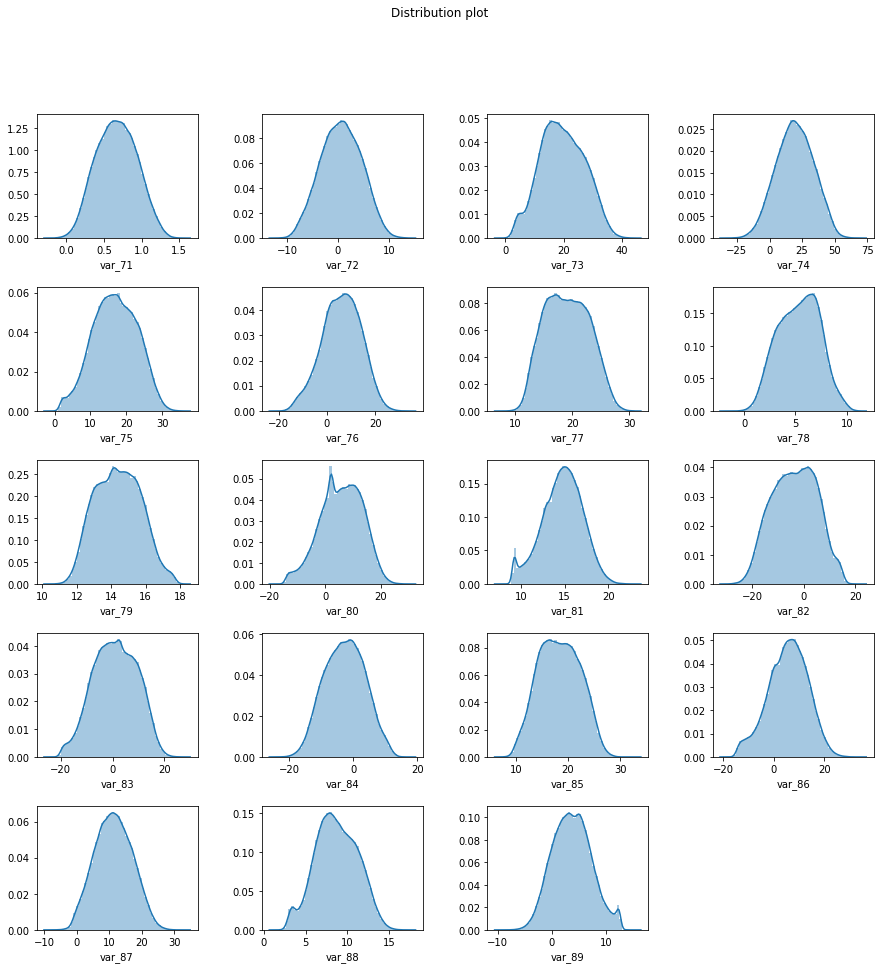

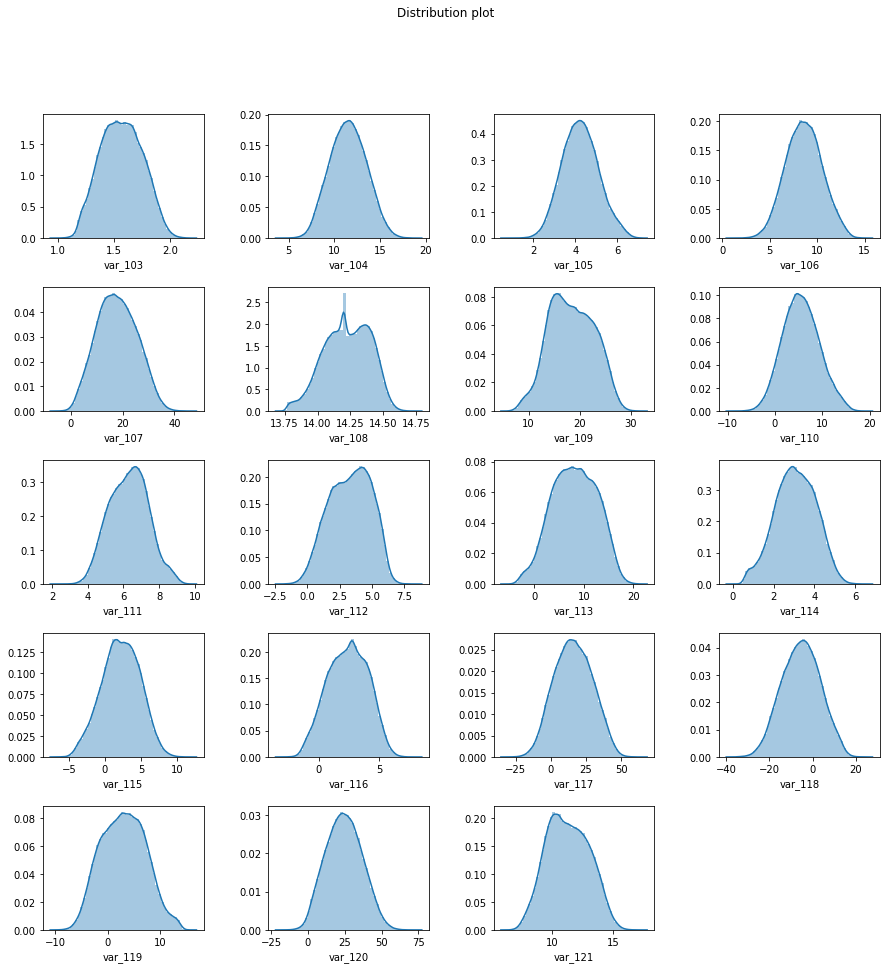

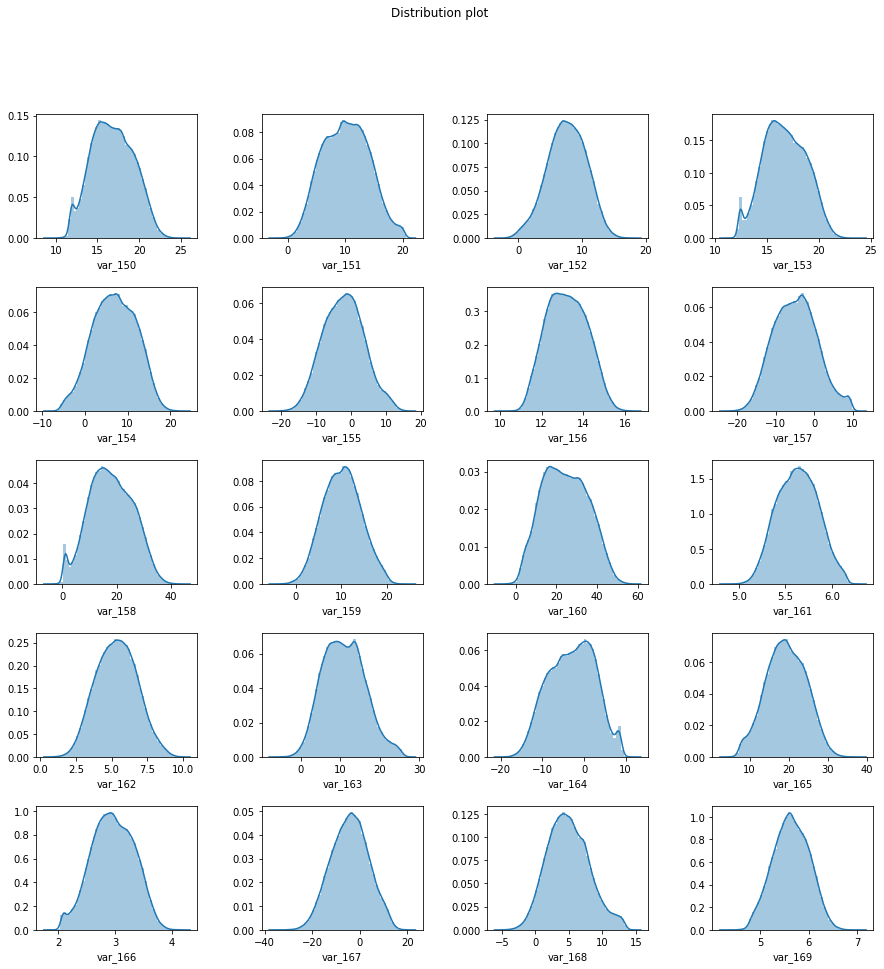

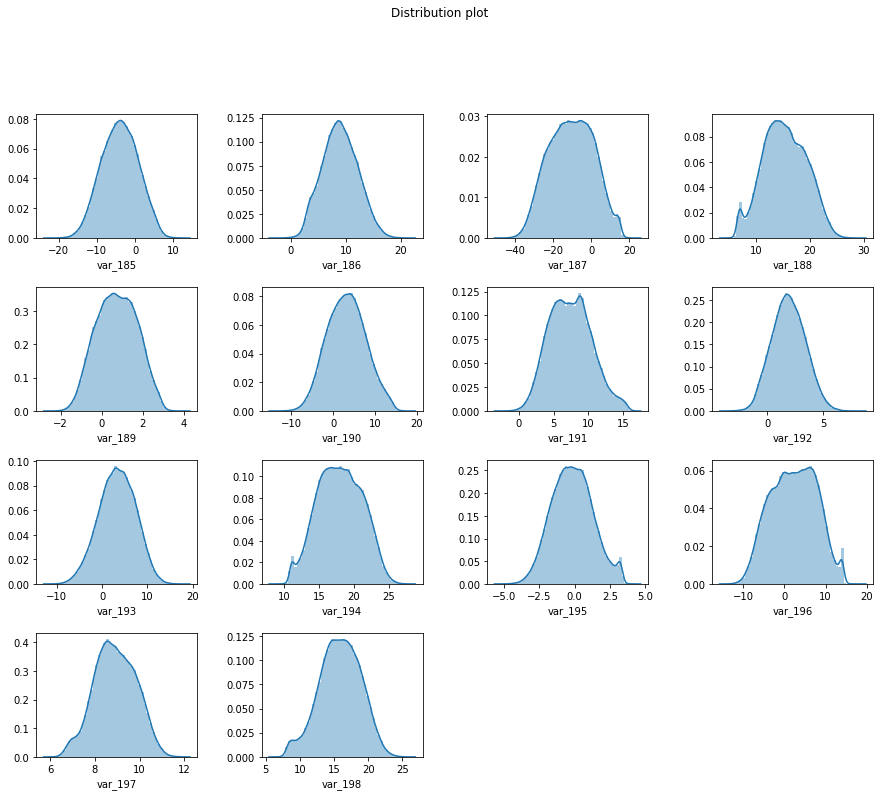

In [45]:
# distribution of train data 
check_distribution(X,25,45)
check_distribution(X,1,20)
check_distribution(X,71,90)
check_distribution(X,103,122)
check_distribution(X,150,170)
check_distribution(X,185,199)

# Observation  Variable Distribution Train data
1. Almost all Distributions of variables are normal

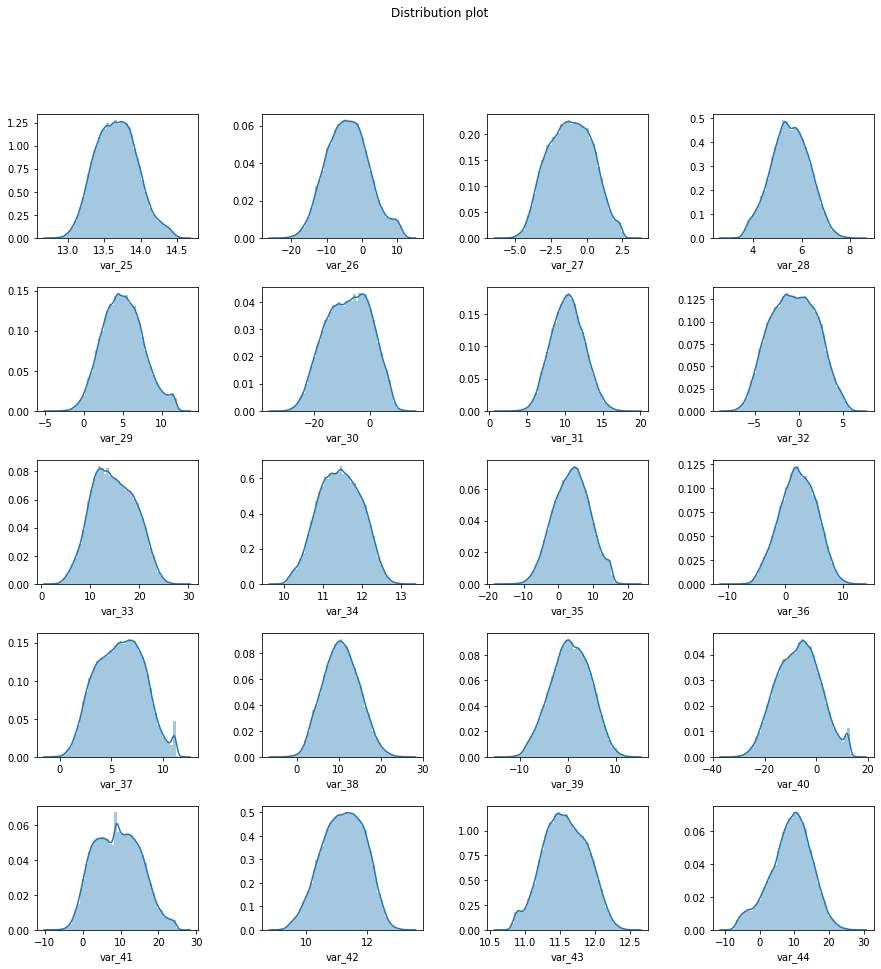

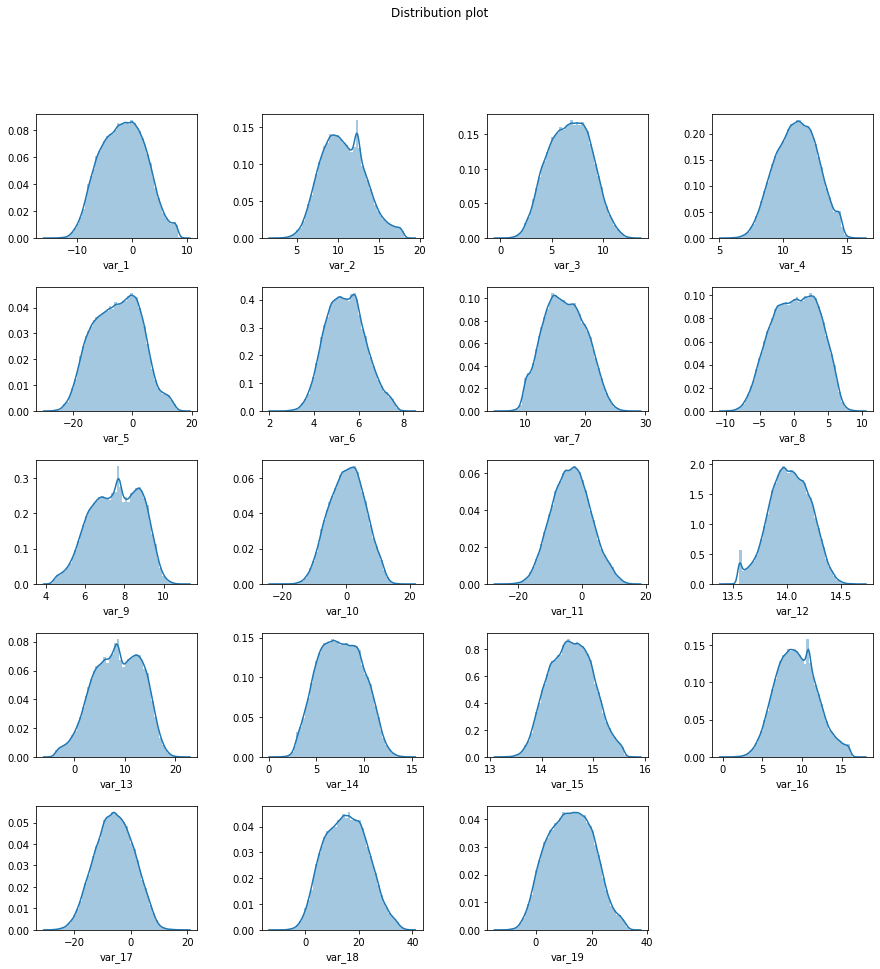

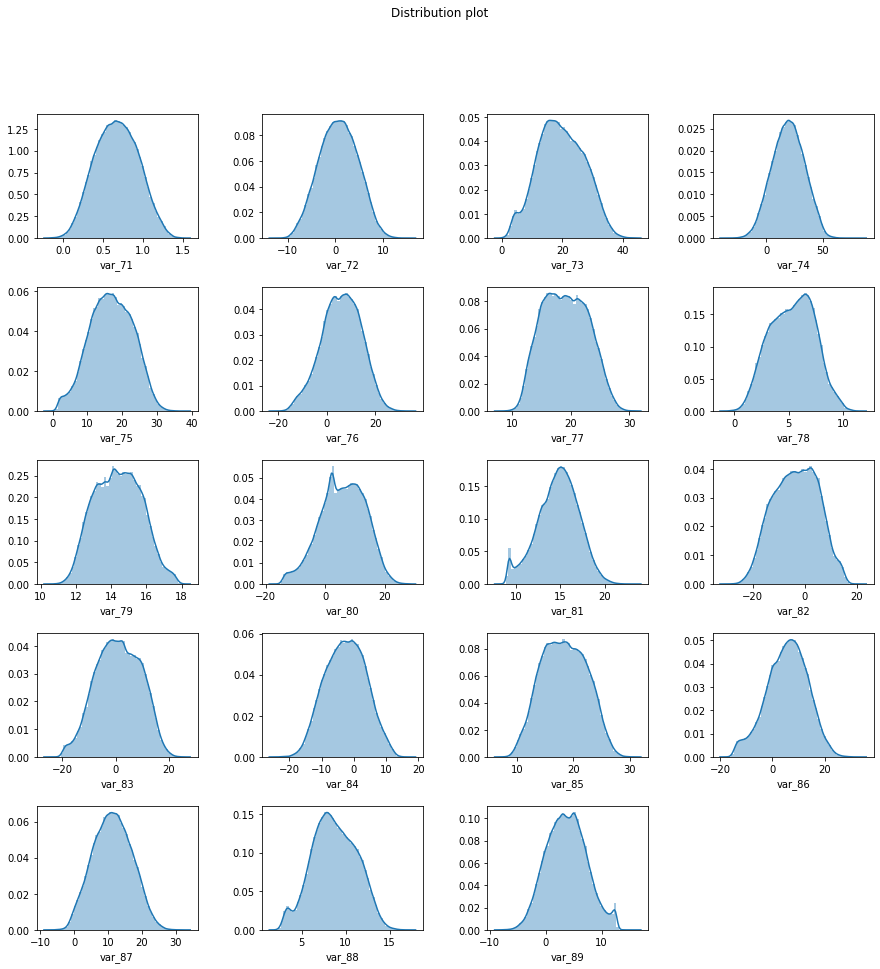

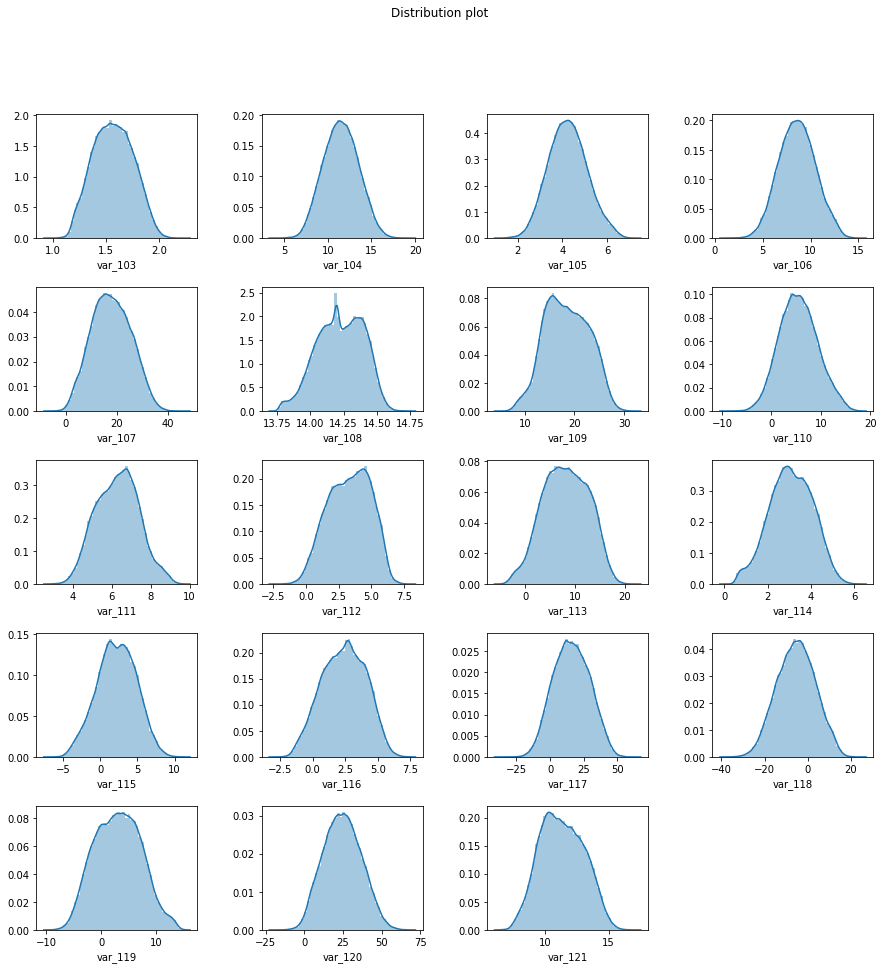

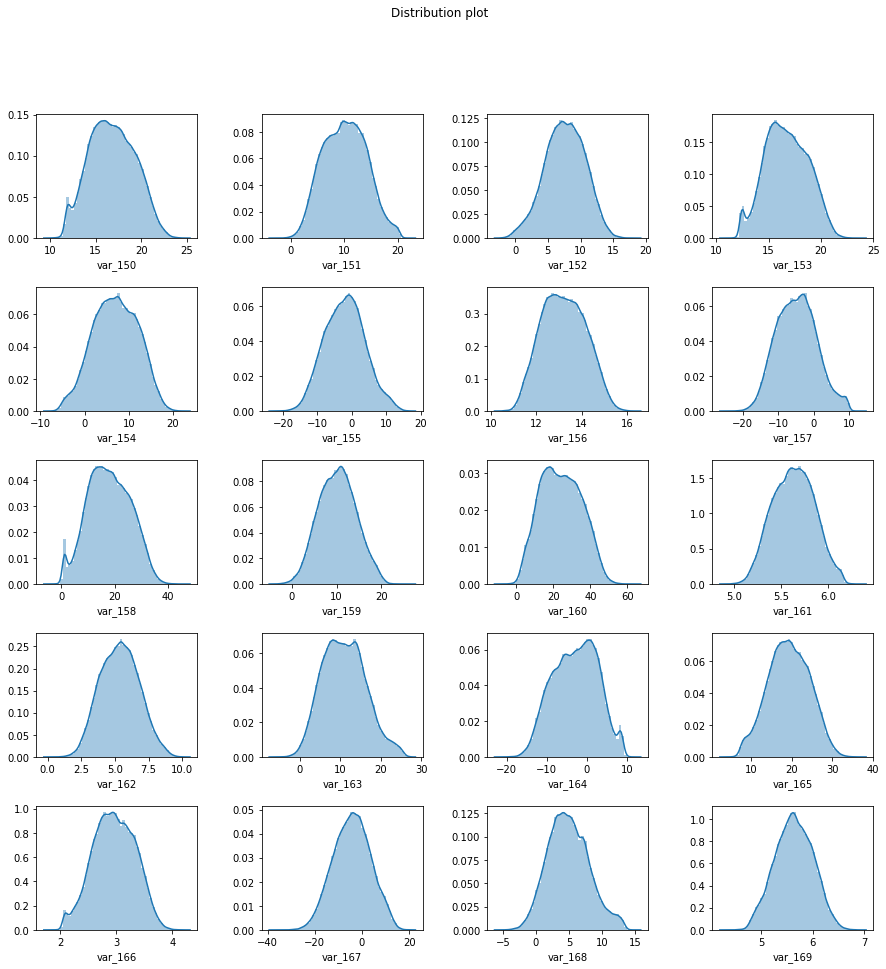

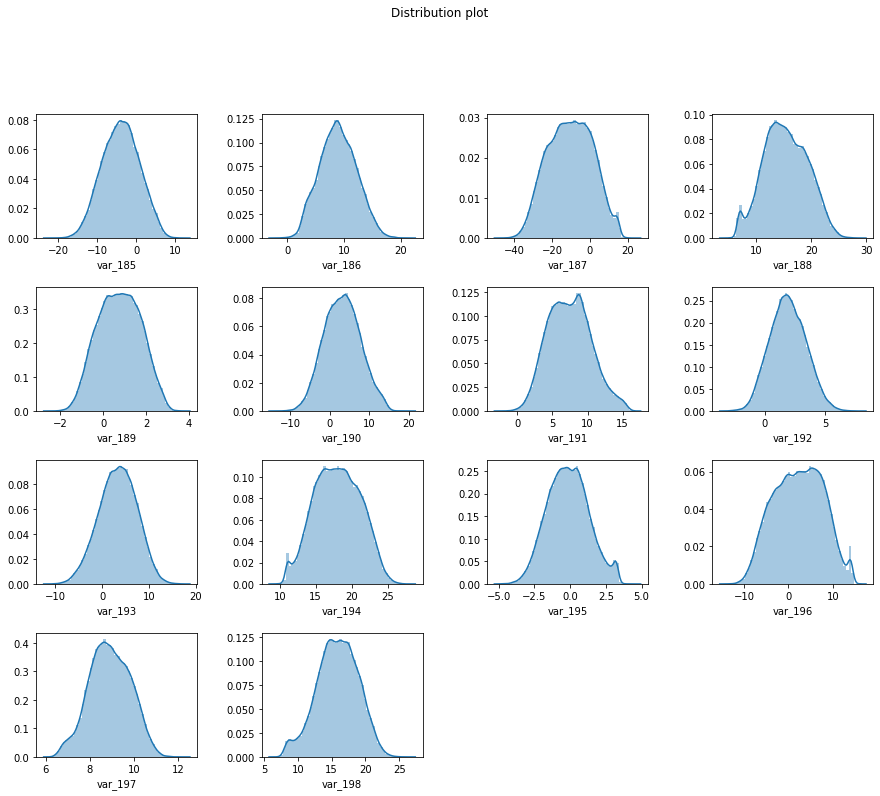

In [46]:
#distribution of test data 
check_distribution(test,25,45)
check_distribution(test,1,20)
check_distribution(test,71,90)
check_distribution(test,103,122)
check_distribution(test,150,170)
check_distribution(test,185,199)

# Observation  distribution Test data
1. Allmost all Distributions of variables are normal
2. Test data is very similar to train data in terms of distribution


# Outlier 

In [0]:
# box plot of first 20 variable
#this function plot boxplot
# start :start index 
# end end index
# df data frame 
def plot_boxplot(df,start,end):
  selected_var =df.columns.values
  fig = plt.figure(figsize=(15,15))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)
  if(start >=0 and end<len(selected_var)):
    for i , realindex in  enumerate(selected_var[start:end],1):
      ax = fig.add_subplot( 5,4, i)
      sns.boxplot(y=X.loc[:,realindex],x=Y ,ax=ax)
      plt.suptitle("box plot ")
      
  plt.show()




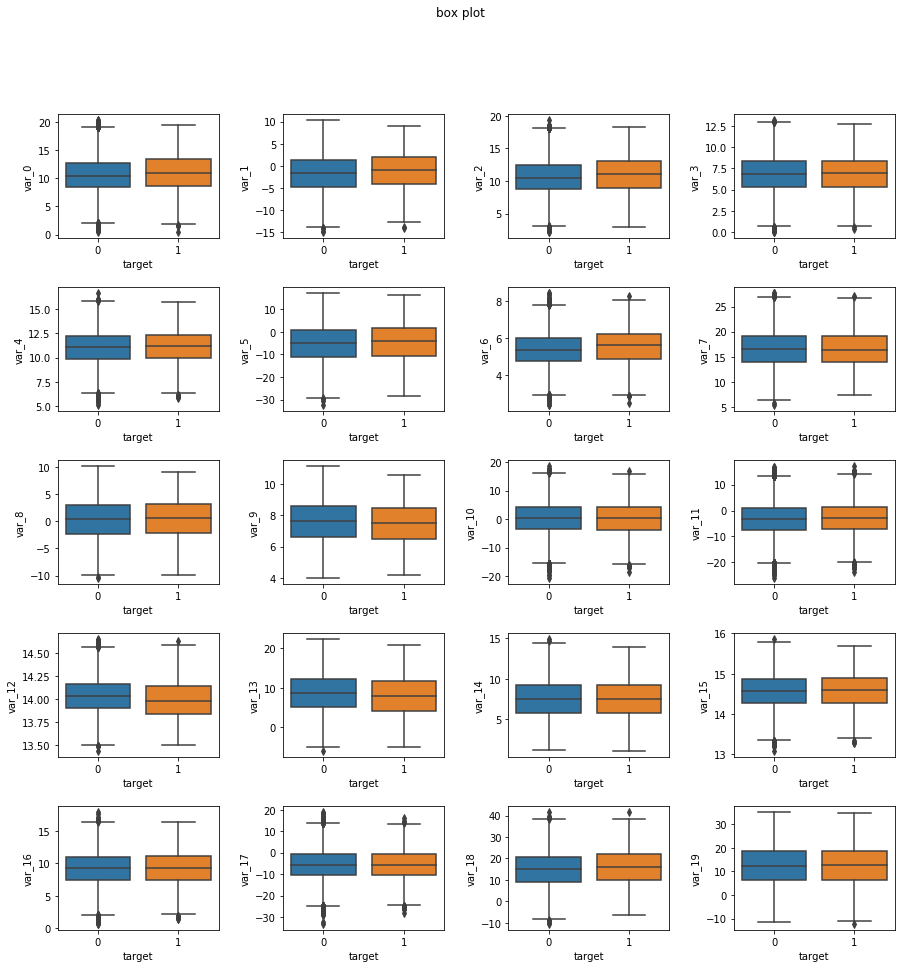

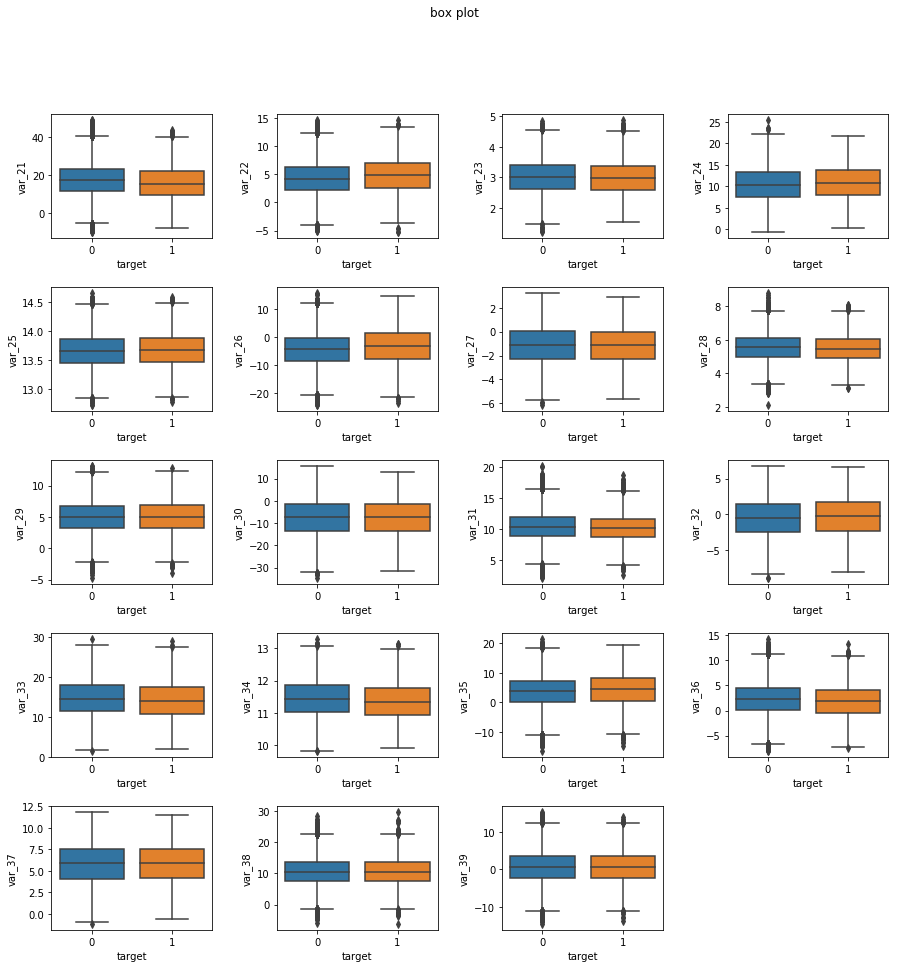

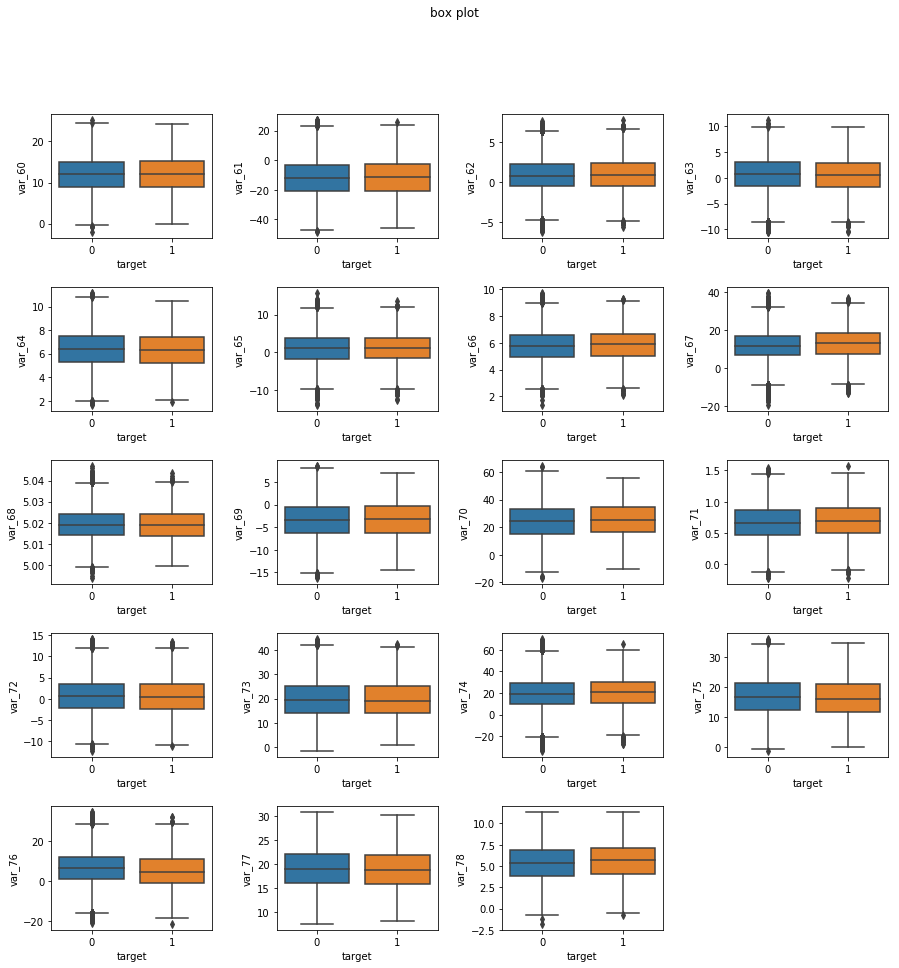

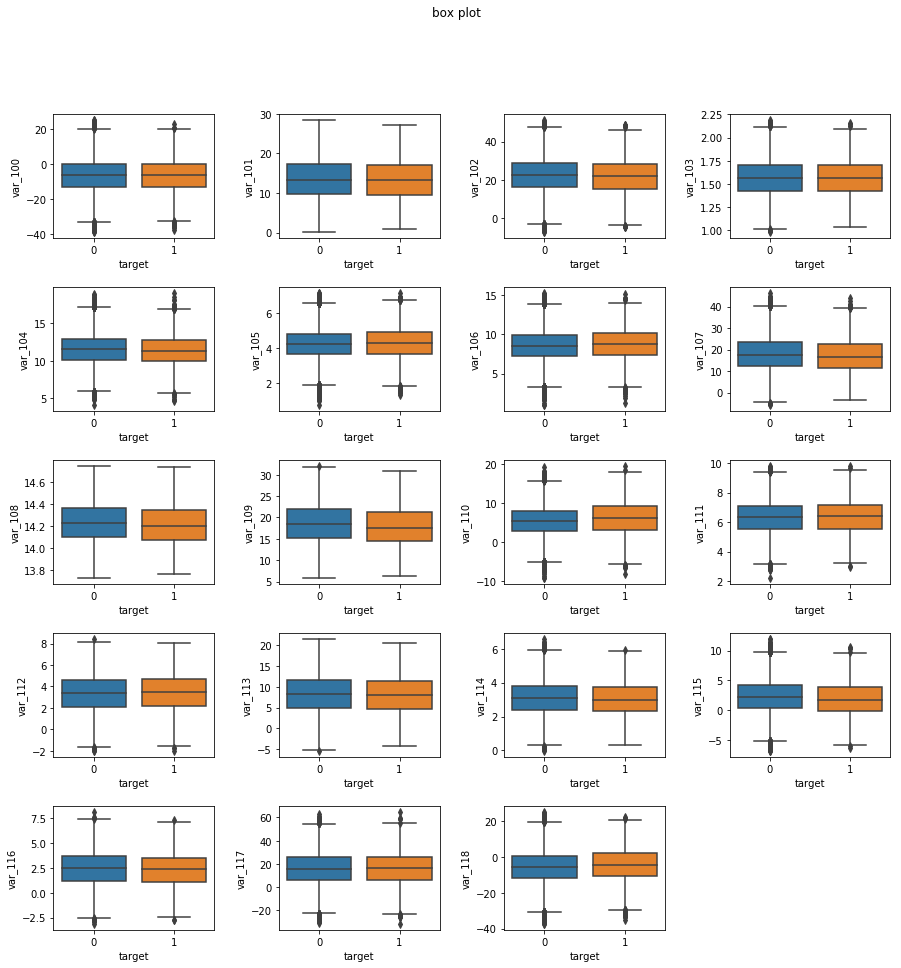

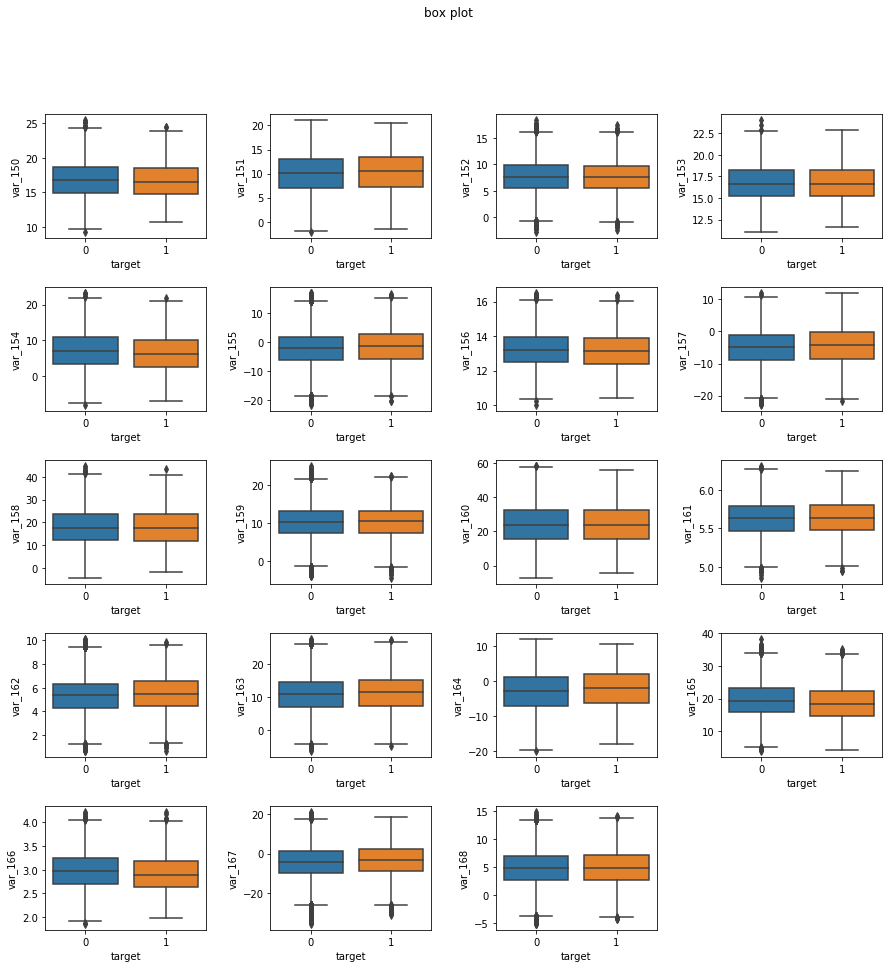

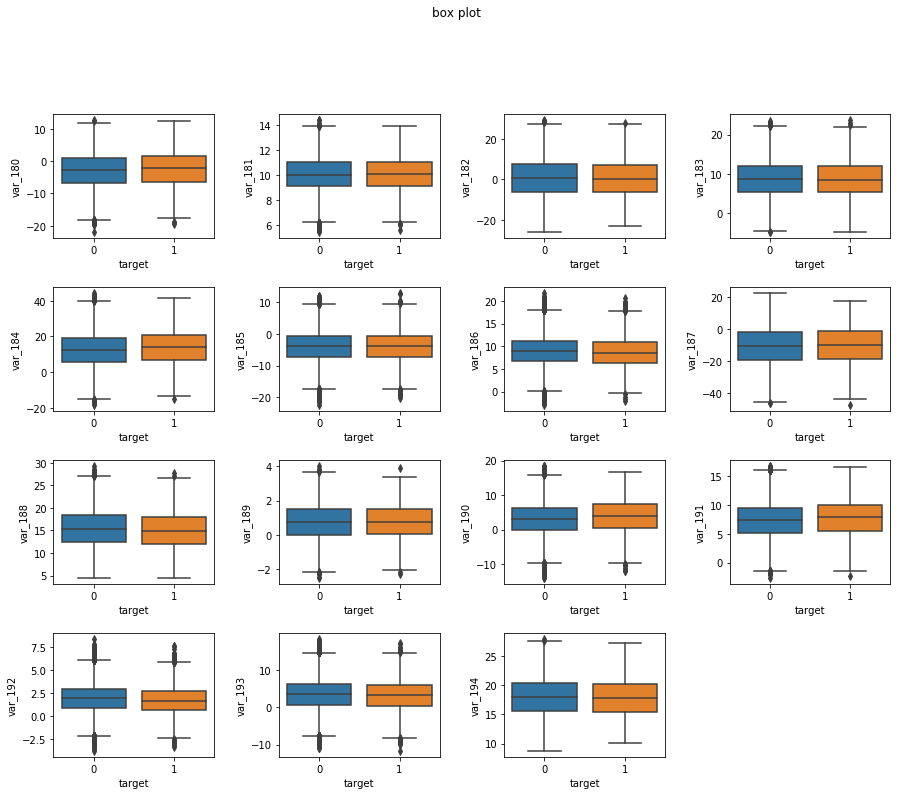

In [38]:
#Train data set
# plot box plot for 20 variables
# X is independent varaiable in train
plot_boxplot(X ,0,20)
plot_boxplot(X ,21,40)
plot_boxplot(X ,60,79)
plot_boxplot(X ,100,119)
plot_boxplot(X ,150,169)
plot_boxplot(X ,180,195)

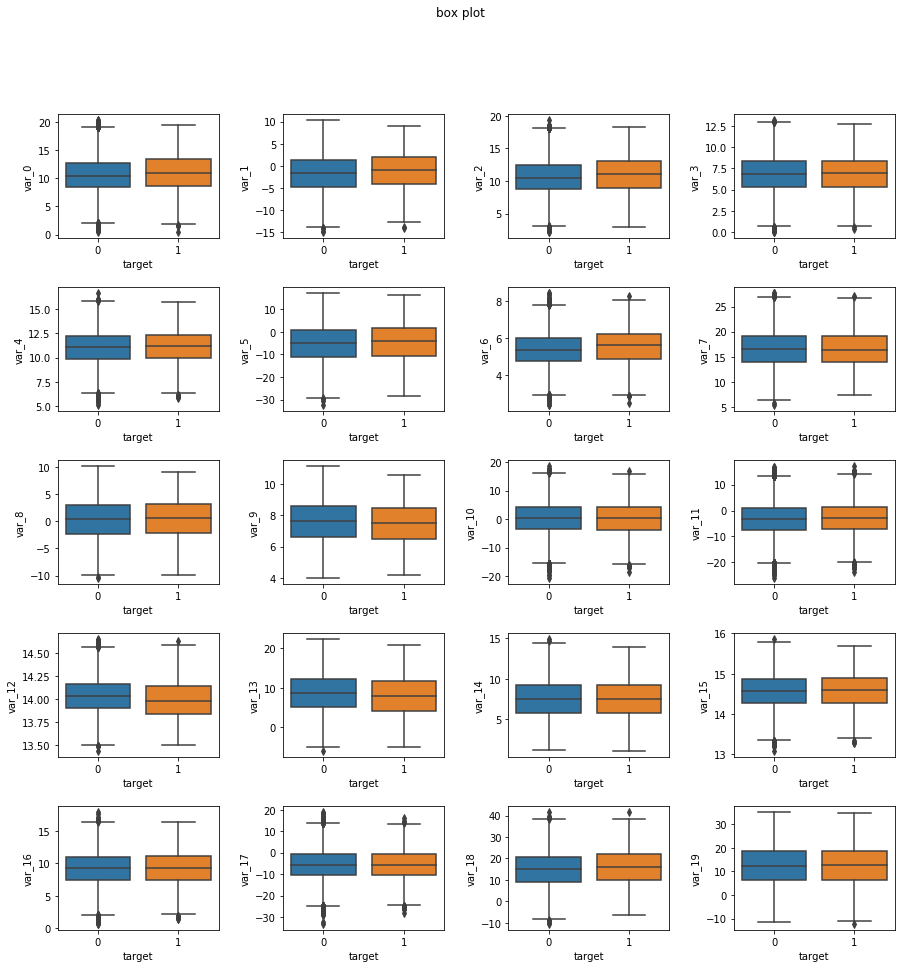

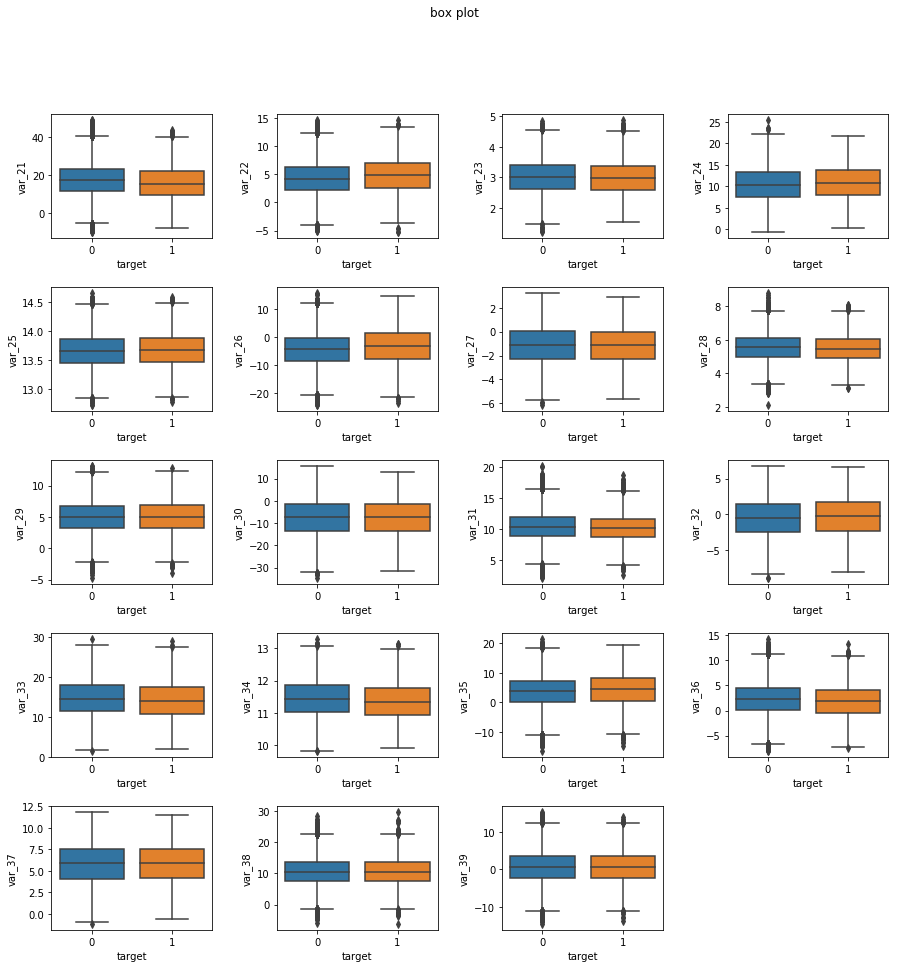

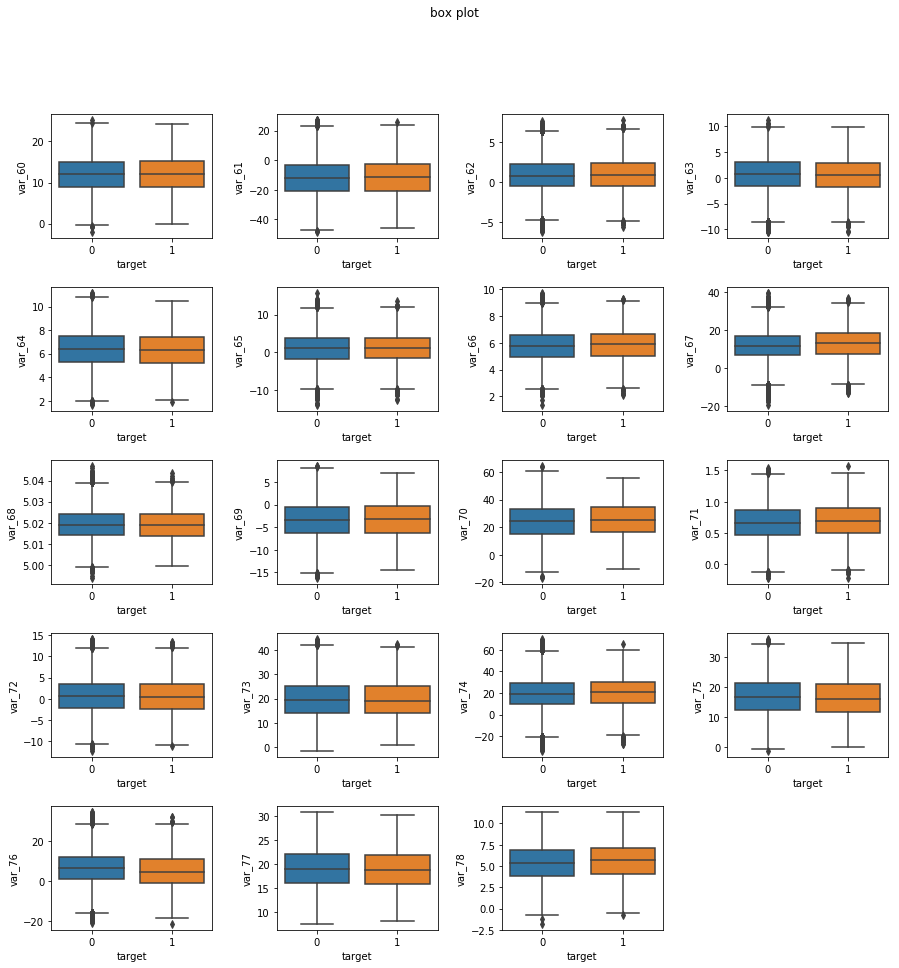

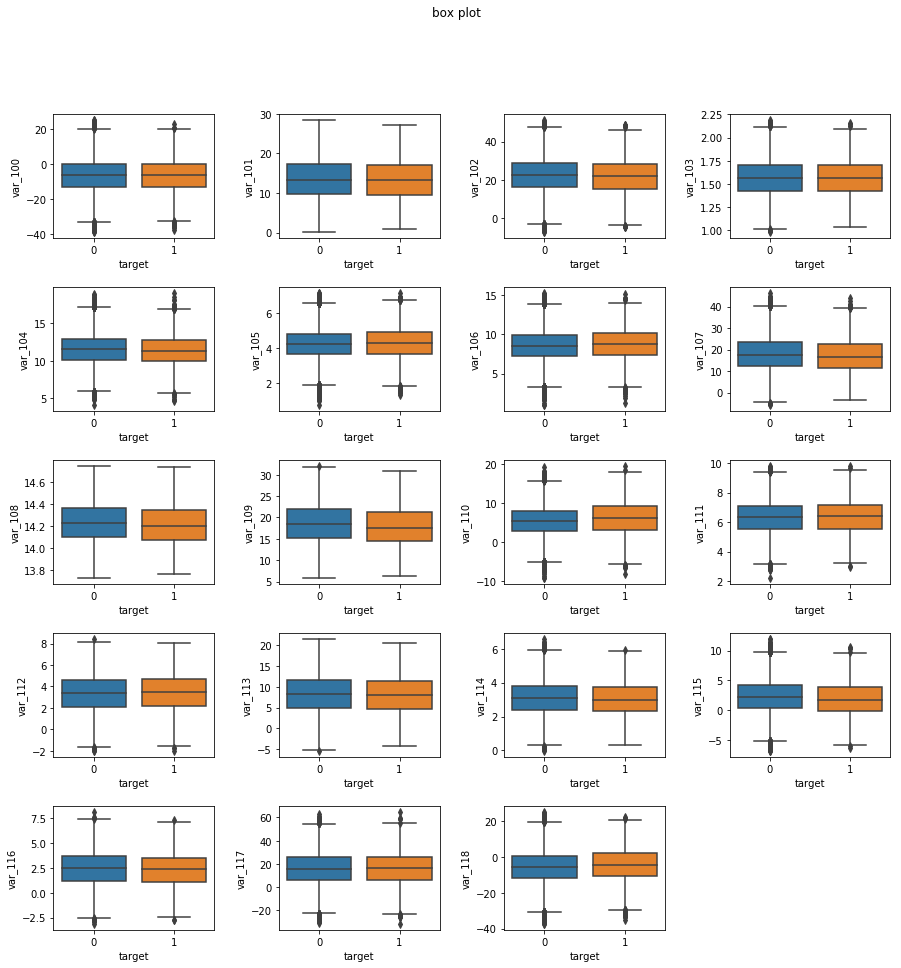

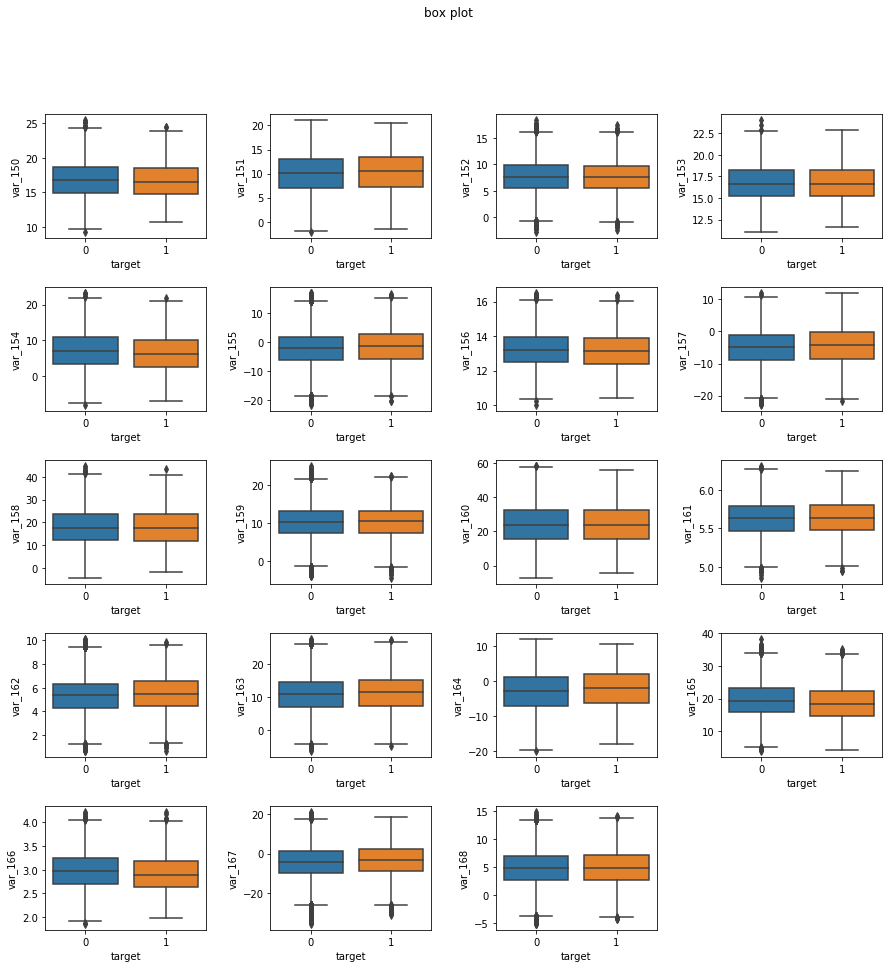

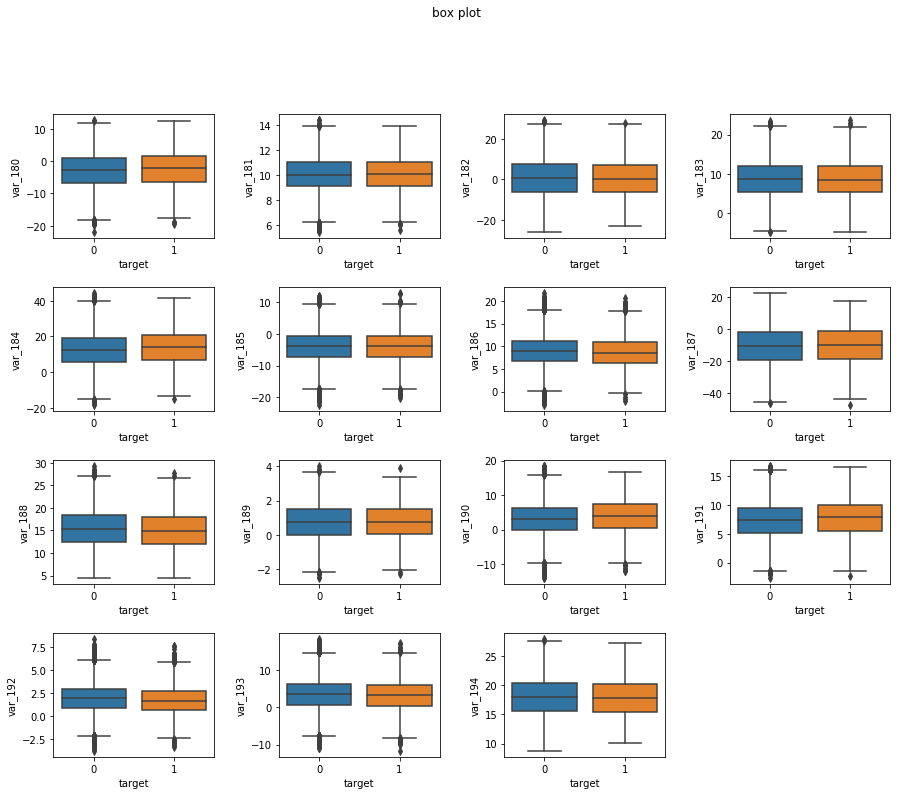

In [39]:
#test data set
# plot box plot for 20 variables

plot_boxplot(test ,0,20)
plot_boxplot(test ,21,40)
plot_boxplot(test ,60,79)
plot_boxplot(test ,100,119)
plot_boxplot(test ,150,169)
plot_boxplot(test ,180,195)

In [47]:
# this function fills values below lower fense and upper fense as nan
# data: data frame
# var_list : name of var to fill outlier with na
def remove_outlier_fillna(data ,var_list):
    for i in var_list:
        q75 ,q25 = np.percentile(data.loc[:,i] ,[75,25])
        iqr =q75-q25
        minimum = q25 -(1.5*iqr)
        maximum =q75+(1.5*iqr)
        print(i,"iqr",iqr,"mimimum",minimum ,"maximum",maximum,sep="  :")
        data.loc[data[i]<minimum ,i]=np.nan
        data.loc[data[i]>maximum ,i]=np.nan
        
    return data
        
        

In [48]:
#remove outlier for train data X is dataframe that contain train dataset independent var

# select columns name from dataframe
selected_var_train =X.columns.values

#remove outlier and fill na 
X =remove_outlier_fillna(X.copy() ,selected_var_train)
# select columns name from dataframe
selected_var_test =X.columns.values
#remove outlier and fill na 
test=remove_outlier_fillna(test.copy() ,selected_var_test)

var_0  :iqr  :4.3043499999999995  :mimimum  :1.9973250000000018  :maximum  :19.214725
var_1  :iqr  :6.09865  :mimimum  :-13.888000000000002  :maximum  :10.5066
var_2  :iqr  :3.794225000000001  :mimimum  :3.031137499999998  :maximum  :18.208037500000003
var_3  :iqr  :3.0700249999999993  :mimimum  :0.6490375000000013  :maximum  :12.9291375
var_4  :iqr  :2.377950000000002  :mimimum  :6.316249999999997  :maximum  :15.828050000000005
var_5  :iqr  :12.12515  :mimimum  :-29.388075  :maximum  :19.112525
var_6  :iqr  :1.2352999999999996  :mimimum  :2.91475  :maximum  :7.855949999999998
var_7  :iqr  :5.159100000000002  :mimimum  :6.205149999999996  :maximum  :26.841550000000005
var_8  :iqr  :5.2557  :mimimum  :-10.20135  :maximum  :10.821449999999999
var_9  :iqr  :1.9656249999999993  :mimimum  :3.6703625000000013  :maximum  :11.532862499999998
var_10  :iqr  :7.977875000000001  :mimimum  :-15.561762500000002  :maximum  :16.349737500000003
var_11  :iqr  :8.363425  :mimimum  :-20.0557375  :maximum 

var_101  :iqr  :7.610425000000001  :mimimum  :-1.7758375000000033  :maximum  :28.665862500000003
var_102  :iqr  :12.634250000000005  :mimimum  :-2.9034000000000084  :maximum  :47.63360000000001
var_103  :iqr  :0.27649999999999997  :mimimum  :1.01415  :maximum  :2.1201499999999998
var_104  :iqr  :2.8042000000000016  :mimimum  :5.891599999999997  :maximum  :17.108400000000003
var_105  :iqr  :1.1825999999999994  :mimimum  :1.865700000000001  :maximum  :6.596099999999999
var_106  :iqr  :2.6466000000000003  :mimimum  :3.3124  :maximum  :13.898800000000001
var_107  :iqr  :11.180525  :mimimum  :-4.6027124999999955  :maximum  :40.1193875
var_108  :iqr  :0.26290000000000013  :mimimum  :13.704550000000001  :maximum  :14.756150000000002
var_109  :iqr  :6.745725  :mimimum  :4.988587500000001  :maximum  :31.971487500000002
var_110  :iqr  :5.286849999999999  :mimimum  :-5.112799999999999  :maximum  :16.034599999999998
var_111  :iqr  :1.5701999999999998  :mimimum  :3.1548000000000007  :maximum  :9.43

var_0  :iqr  :4.296624999999999  :mimimum  :1.9980375000000024  :maximum  :19.184537499999998
var_1  :iqr  :6.043525  :mimimum  :-13.7654125  :maximum  :10.4086875
var_2  :iqr  :3.7594250000000002  :mimimum  :3.0964624999999995  :maximum  :18.134162500000002
var_3  :iqr  :3.0971  :mimimum  :0.5848500000000003  :maximum  :12.97325
var_4  :iqr  :2.3623250000000002  :mimimum  :6.347587499999999  :maximum  :15.7968875
var_5  :iqr  :12.143975  :mimimum  :-29.4173625  :maximum  :19.1585375
var_6  :iqr  :1.2332  :mimimum  :2.9227999999999996  :maximum  :7.8556
var_7  :iqr  :5.160650000000002  :mimimum  :6.192924999999996  :maximum  :26.835525000000004
var_8  :iqr  :5.233925  :mimimum  :-10.154787500000001  :maximum  :10.780912500000001
var_9  :iqr  :1.9610249999999985  :mimimum  :3.6822625000000024  :maximum  :11.526362499999996
var_10  :iqr  :7.9884  :mimimum  :-15.608600000000003  :maximum  :16.345000000000002
var_11  :iqr  :8.354525  :mimimum  :-20.0537875  :maximum  :13.3643125
var_12  :i

var_111  :iqr  :1.5729499999999996  :mimimum  :3.144950000000001  :maximum  :9.43675
var_112  :iqr  :2.487025  :mimimum  :-1.6424625000000002  :maximum  :8.3056375
var_113  :iqr  :6.841525  :mimimum  :-5.467787499999999  :maximum  :21.8983125
var_114  :iqr  :1.4193249999999997  :mimimum  :0.26748750000000054  :maximum  :5.9447874999999994
var_115  :iqr  :3.710125  :mimimum  :-5.1796875  :maximum  :9.6608125
var_116  :iqr  :2.4928  :mimimum  :-2.5793999999999997  :maximum  :7.3918
var_117  :iqr  :19.402099999999997  :mimimum  :-22.786549999999995  :maximum  :54.82185
var_118  :iqr  :12.435599999999999  :mimimum  :-30.174299999999995  :maximum  :19.568099999999998
var_119  :iqr  :6.2552  :mimimum  :-9.5139  :maximum  :15.5069
var_120  :iqr  :17.2997  :mimimum  :-10.188150000000002  :maximum  :59.010650000000005
var_121  :iqr  :2.6077249999999985  :mimimum  :6.095712500000003  :maximum  :16.5266125
var_122  :iqr  :7.610899999999999  :mimimum  :-13.959649999999998  :maximum  :16.4839499999

In [49]:
# Before imputation
# total missing in train 
print(X.isnull().sum().sum())

print('#'*30)
#total missing in test
print(test.isnull().sum().sum())

#percentage of missing value in train
print(X.isnull().mean()*100)
print('#'*30)
#percentage of missing value in test
print(test.isnull().mean()*100)

26536
##############################
27091
var_0      0.0520
var_1      0.0030
var_2      0.0245
var_3      0.0110
var_4      0.0380
var_5      0.0020
var_6      0.0565
var_7      0.0095
var_8      0.0010
var_9      0.0000
var_10     0.0625
var_11     0.1545
var_12     0.0195
var_13     0.0005
var_14     0.0010
var_15     0.0110
var_16     0.0340
var_17     0.1105
var_18     0.0055
var_19     0.0005
var_20     0.0005
var_21     0.1375
var_22     0.1445
var_23     0.0450
var_24     0.0020
var_25     0.1205
var_26     0.0930
var_27     0.0015
var_28     0.0965
var_29     0.0720
            ...  
var_170    0.2065
var_171    0.0770
var_172    0.1985
var_173    0.0655
var_174    0.0170
var_175    0.0010
var_176    0.0200
var_177    0.0015
var_178    0.0215
var_179    0.7545
var_180    0.0170
var_181    0.0330
var_182    0.0025
var_183    0.0115
var_184    0.0215
var_185    0.1155
var_186    0.2230
var_187    0.0015
var_188    0.0115
var_189    0.0075
var_190    0.0815
var_191    0.0400
var

In [50]:
#this function imputes missingvalue with mean of that column 
#data = dataframe
#column_name = name of  columns of data frame 
def impute_na_with_mean(data, column_name):
    for i in column_name:
        data.loc[:,i]=data.loc[:,i].fillna(data.loc[:,i].mean())
    return data

In [51]:
# select columns name from dataframe
selected_var_train =X.columns.values
#impute mean
X =impute_na_with_mean(X.copy() ,selected_var_train)
# select columns name from dataframe
selected_var_test =X.columns.values
#impute mean
test=impute_na_with_mean(test.copy() ,selected_var_test)

In [52]:
# after Imputation 
# total missing in train 
print(X.isnull().sum().sum())

print('#'*30)
#total missing in test
print(test.isnull().sum().sum())

#percentage of missing value in train
print(X.isnull().mean()*100)
print('#'*30)
#percentage of missing value in test
print(test.isnull().mean()*100)

0
##############################
0
var_0      0.0
var_1      0.0
var_2      0.0
var_3      0.0
var_4      0.0
var_5      0.0
var_6      0.0
var_7      0.0
var_8      0.0
var_9      0.0
var_10     0.0
var_11     0.0
var_12     0.0
var_13     0.0
var_14     0.0
var_15     0.0
var_16     0.0
var_17     0.0
var_18     0.0
var_19     0.0
var_20     0.0
var_21     0.0
var_22     0.0
var_23     0.0
var_24     0.0
var_25     0.0
var_26     0.0
var_27     0.0
var_28     0.0
var_29     0.0
          ... 
var_170    0.0
var_171    0.0
var_172    0.0
var_173    0.0
var_174    0.0
var_175    0.0
var_176    0.0
var_177    0.0
var_178    0.0
var_179    0.0
var_180    0.0
var_181    0.0
var_182    0.0
var_183    0.0
var_184    0.0
var_185    0.0
var_186    0.0
var_187    0.0
var_188    0.0
var_189    0.0
var_190    0.0
var_191    0.0
var_192    0.0
var_193    0.0
var_194    0.0
var_195    0.0
var_196    0.0
var_197    0.0
var_198    0.0
var_199    0.0
Length: 200, dtype: float64
######################

# Standardising data

In [53]:
#standardising data
# df data passed to standardise 
def std_data (df  ): 
    scaler =StandardScaler()
    return pd.DataFrame(scaler.fit_transform(df) ,columns=df.columns)
    

In [54]:
# standardising  test train dataset 
X= std_data(X)
test=std_data(test)

# Model Training 
1. Logistic regression
2. Decision tree 
3. Random Forest 
4. Naive bayes 

# generic Function 

In [55]:




# ploting roc curve 
#This function takes target variable and its predicted probality to plot roc curve 
def roc_plot(Y_true ,Y_prob ,model="model") :
  fpr, tpr, thresholds =roc_curve(Y_true, Y_prob)
  plt.plot(fpr, tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.title('ROC curve for  %s'%model)
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.grid(True)
  plt.show()
  print('  AUC: %.3f' % auc(fpr,tpr))
  
  
  


# Return model accuracy param
#  This function calculate model performance criteria
#     from confusion matrix    a
#    return a dictinary of model performance criteria
def model_accuracy(conf_matrix):
  
  


 
    model_pram={}
    tn =conf_matrix.iloc[0,0]
    tp =conf_matrix.iloc[1,1]
    fp =conf_matrix.iloc[0,1]
    fn =conf_matrix.iloc[1,0]
    model_pram['precision'] =(tp)/(tp+fp)
    model_pram['accuracy']  =(tp+tn)/(tp+tn+fp+fn)
    model_pram['recall']  =(tp)/(tp+fn)
    model_pram['specificity'] =(tn)/(tn +fp)
    model_pram['fpr'] =(fp)/(fp+tn)
    model_pram['fnr'] =(fn)/(fn+tp)
    model_pram['f1'] =2*(( model_pram['precision'] *model_pram['recall'])/( model_pram['precision'] +model_pram['recall']))
    return model_pram




# ploting roc curve 
#This function takes target variable and its predicted probality to plot Precision Recall curve  
def precision_recall_plot(Y_true ,Y_prob ,model="model"):
  precision, recall, thresholds = precision_recall_curve(Y_true, Y_prob)
  auc_score = auc(recall, precision)
  plt.plot(recall, precision, marker='.')

  plt.title('Precision recall curve for  %s'%model)
  plt.xlabel('recall')
  plt.ylabel('Precision')
  plt.grid(True)
  plt.show()
  print(' Precision recall AUC: %.3f' % auc_score)
  
  
#This function runs model  and return confusion matrix 
# plot roc_auc plot 
# plot precision recall plot 
# model_object = object of fitted model 
# X = Independent var
# Y =target variable
# model name  = name of model
def run_model(model_object , X,Y ,model_name):
       
  

    # store the predicted probabilities for class 1
    pred_prob = model_object.predict_proba(X)[:, 1]

    # store the class prediction of model 
    y_pred=model_object.predict(X)

    # create confusion matrix 
    conf =pd.crosstab(Y,y_pred)

    # Print model accuracy parameter  
    print(model_accuracy(conf))

    #calling roc_plot method
    roc_plot(Y ,pred_prob ,model_name)

    #Precision recall curve 
    precision_recall_plot(Y ,pred_prob ,model_name)
    
    return conf


# Logistic regression

/home/aditya/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'precision': 0.28493852272933656, 'accuracy': 0.781095, 'recall': 0.7806249378047567, 'specificity': 0.7811475136463185, 'fpr': 0.21885248635368146, 'fnr': 0.2193750621952433, 'f1': 0.41748825822589447}


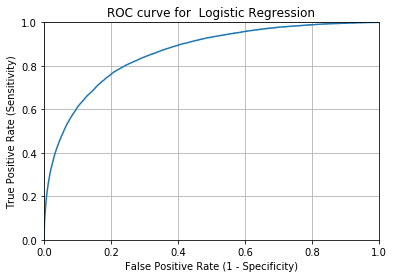

  AUC: 0.861


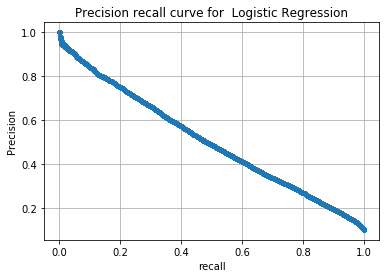

 Precision recall AUC: 0.506


In [56]:
#class_weight ='balanced '  for imbalanced data set 
logit_model =LogisticRegression(class_weight='balanced' , random_state=5 )

#fit model
logit_model.fit(X,Y)

confMatrix=run_model(logit_model , X,Y ,"Logistic Regression")

 
# Hyper Parameter tuning of Logistic regression 
1. we will focus on reducing false negative rate as we dont want to lose  customers that have higher chance of making transaction
2. we will also try to maximise roc_auc
3. Precision recall auc is also important metric incase of class imbalance problem which we will try to maximise 
4. we try to reduce false positive rate as we dont want to predict user that are not going to make transaction as the one to make transaction
5. we are more worried to predict positive class properly


In [50]:
# specify "parameter distributions" rather than a "parameter grid"
#penalty l1 l2 norm
# C regularistion term
# class_weight balanced as it make weight balanced it is usefull incase of imbalanced class problem , 
# max_iter number of iteraton algorithm will run

param_dist = dict(penalty=['l1','l2'] ,C=np.logspace(-4, 4, 20),class_weight=['balanced'] ,max_iter=[5,10,15,20])

#initilising    RandomizedSearchCV 

rand = RandomizedSearchCV(logit_model, param_dist, cv=10, scoring='roc_auc', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X, Y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureW

,mean_test_score,std_test_score,params
0,0.857568,0.003773,"{'penalty': 'l1', 'max_iter': 10, 'class_weigh..."
1,0.858612,0.003783,"{'penalty': 'l1', 'max_iter': 5, 'class_weight..."
2,0.858611,0.003784,"{'penalty': 'l1', 'max_iter': 5, 'class_weight..."
3,0.858600,0.003782,"{'penalty': 'l1', 'max_iter': 10, 'class_weigh..."
4,0.858600,0.003782,"{'penalty': 'l2', 'max_iter': 20, 'class_weigh..."
5,0.858603,0.003780,"{'penalty': 'l1', 'max_iter': 20, 'class_weigh..."
6,0.858650,0.003794,"{'penalty': 'l2', 'max_iter': 15, 'class_weigh..."
7,0.858600,0.003782,"{'penalty': 'l2', 'max_iter': 15, 'class_weigh..."
8,0.858798,0.003844,"{'penalty': 'l2', 'max_iter': 5, 'class_weight..."
9,0.858650,0.003794,"{'penalty': 'l2', 'max_iter': 20, 'class_weigh..."


In [51]:
# Best hyper parameter of logistic regression 
#best roc_auc score 
print(rand.best_score_)
# best model parameter
print(rand.best_params_)

0.8587982066820331
{'penalty': 'l2', 'max_iter': 5, 'class_weight': 'balanced', 'C': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'precision': 0.2597749380125882, 'accuracy': 0.74837, 'recall': 0.8132152452980396, 'specificity': 0.7411257240052918, 'fpr': 0.25887427599470825, 'fnr': 0.1867847547019604, 'f1': 0.3937649071240995}


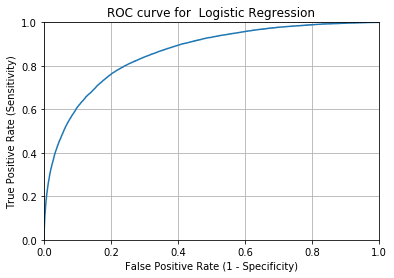

  AUC: 0.861


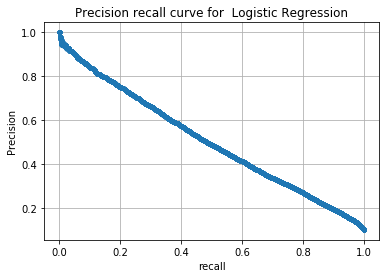

 Precision recall AUC: 0.507


In [52]:
#Init logistic model with best param
logit_model =LogisticRegression(penalty= 'l2', max_iter= 5, class_weight= 'balanced', C= 0.0001,random_state =5)
logit_model.fit(X,Y)
confMatrix=run_model(logit_model , X,Y ,"Logistic Regression")


Observation 
1. Fnr have decreased 28% to 22%
2. Precision recall AUC: is same 50%
3. Fpr have decreased   from 28% to 25%
4. Roc_auc score is same 86%
5. Fnr have decreased from 21% to 18%
6. Accuracy have decreased from 78% to 74%
7. F1 score have reduced from 41% to 39%
8. Optimed model is  reducing fnr but over all f1 score is reduced 
9. Previous and current model perform almost identical 


In [53]:
# #logistic regression 10 fold validation 
# checking if model is over fitting 

logit_scores = cross_validate(logit_model, X, Y, cv=10, scoring=['accuracy','f1','precision','recall','roc_auc'],)
pd.DataFrame(logit_scores).mean()

# model is not over fitting of model accuracy metric is close to testing data

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

fit_time          4.887205
score_time        0.084035
test_accuracy     0.745170
test_f1           0.390704
test_precision    0.257146
test_recall       0.813017
test_roc_auc      0.858798
dtype: float64

# Decision tree 

In [54]:
# lets try to fit data and get classifcation accuracy
#max depth : maximum depth that tree is allowed to grow 
#class_weght :( The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)) )

dt_model =DecisionTreeClassifier( max_depth= 5,class_weight='balanced' ,random_state =5)
#fit model
dt_model.fit(X,Y)






DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

{'precision': 0.16313815537696136, 'accuracy': 0.679455, 'recall': 0.5302517663449099, 'specificity': 0.696123444986715, 'fpr': 0.30387655501328503, 'fnr': 0.46974823365509005, 'f1': 0.24951125575079308}


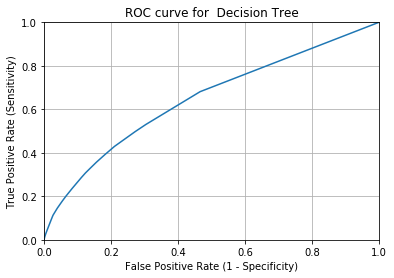

  AUC: 0.647


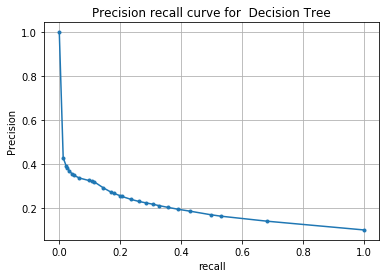

 Precision recall AUC: 0.197


In [55]:
confMatrix=run_model(dt_model , X,Y ,"Decision Tree")


1. precision is 16%
2.  recall is 53%
3. Fpr is 30%
4. Fnr is 46% 
5. f1  is 24%
6. accuracy is 67%

# Hyparameter tuning of Decision tree
1. we will focus on reducing false negative rate as we dont want to lose  customer that have higher chance of makeing transaction
2. we will also try to maximise roc_auc
3. Precision recall auc is also important metric incase of class imbalance problem which we will try to maximise 
4. we try to reduce false positve rate as we dont want to predict user that are not going to make transaction as the one to make transaction
5. we are more worried to predict positive class properly

In [56]:
# criterion: either 'gini' or 'entropy' based algo for decision tree
# max_depth: max dept the tree will be made to grow 
# min_samples_split : minimum no of sample required to split


param_dist =dict(criterion= ['gini', 'entropy'],
             max_depth= [1, 2, 3, 4, 5],
             min_samples_split= [2, 3] ,class_weight=['balanced' ,None] )

# randomized search for given model parameter
rand = RandomizedSearchCV(dt_model, param_dist, cv=5, scoring='roc_auc', n_iter=10, random_state=5,n_jobs=-1 ,return_train_score=False)
rand.fit(X, Y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


,mean_test_score,std_test_score,params
0,0.547272,0.004244,"{'min_samples_split': 2, 'max_depth': 1, 'crit..."
1,0.576375,0.007074,"{'min_samples_split': 2, 'max_depth': 2, 'crit..."
2,0.602227,0.003539,"{'min_samples_split': 2, 'max_depth': 3, 'crit..."
3,0.587578,0.004396,"{'min_samples_split': 3, 'max_depth': 2, 'crit..."
4,0.576375,0.007074,"{'min_samples_split': 3, 'max_depth': 2, 'crit..."
5,0.623677,0.003908,"{'min_samples_split': 2, 'max_depth': 4, 'crit..."
6,0.609061,0.005723,"{'min_samples_split': 2, 'max_depth': 3, 'crit..."
7,0.635282,0.004009,"{'min_samples_split': 3, 'max_depth': 5, 'crit..."
8,0.627698,0.003655,"{'min_samples_split': 2, 'max_depth': 5, 'crit..."
9,0.609061,0.005723,"{'min_samples_split': 3, 'max_depth': 3, 'crit..."


In [57]:
# Best hyper parameter of Decision tree 
#Best Auc_roc score 
print(rand.best_score_)
# Best Decision parmameter learned 
print(rand.best_params_)

0.6352817585743945
{'min_samples_split': 3, 'max_depth': 5, 'criterion': 'entropy', 'class_weight': None}


{'precision': 0.66, 'accuracy': 0.89999, 'recall': 0.009851726539954224, 'specificity': 0.9994330246467521, 'fpr': 0.0005669753532478794, 'fnr': 0.9901482734600457, 'f1': 0.019413668006667318}


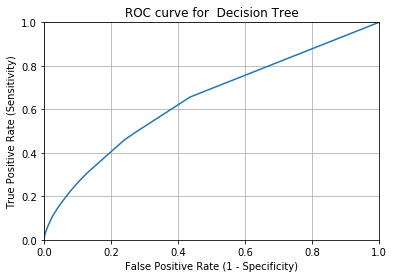

  AUC: 0.643


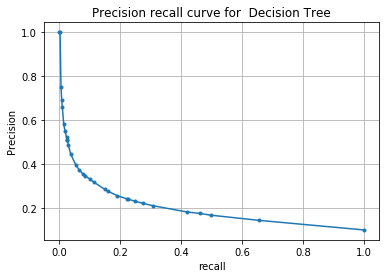

 Precision recall AUC: 0.202


In [58]:
#Init Decision tree  model with best parameter
dt_model =DecisionTreeClassifier(class_weight=None ,random_state =5 ,min_samples_split= 3, max_depth=5, criterion='entropy')
dt_model.fit(X,Y)

confMatrix=run_model(dt_model , X,Y ,"Decision Tree")

# Observation 
1. Fnr have increased from 45% to 98% 
2. Precision recall AUC: increased 1%
3. Fpr have reduced from 31% to 0.05%
4. Roc_auc score almost same 64%

6. Accuracy have increased from 66% to 90%
7. F1 score have reduced from 24% to 2%
8. Optimed model perform worse than base model


{'precision': 0.16325311355872485, 'accuracy': 0.679685, 'recall': 0.5302517663449099, 'specificity': 0.696379139753866, 'fpr': 0.303620860246134, 'fnr': 0.46974823365509005, 'f1': 0.24964568912002058}


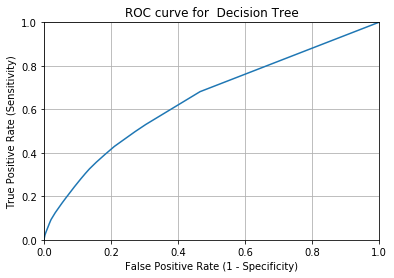

  AUC: 0.647


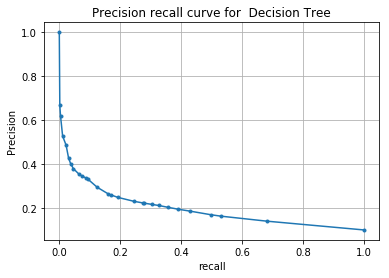

 Precision recall AUC: 0.197


In [59]:
# Lets try to make class_wieght balanced and then see if model perform any better 
dt_model =DecisionTreeClassifier(class_weight='balanced' ,random_state =5 ,min_samples_split= 3, max_depth=5, criterion='entropy')
dt_model.fit(X,Y)

confMatrix=run_model(dt_model , X,Y ,"Decision Tree")

#model performance is similar to base model no impovement but better than tuned model 

# Naive bayes 

{'precision': 0.7181307305530908, 'accuracy': 0.921635, 'recall': 0.36242412180316447, 'specificity': 0.9841080143633756, 'fpr': 0.015891985636624386, 'fnr': 0.6375758781968355, 'f1': 0.48173010151780693}


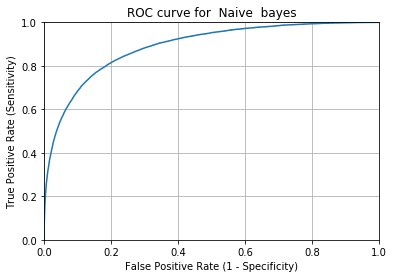

  AUC: 0.889


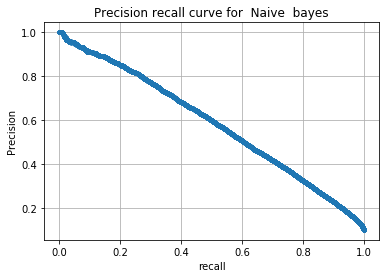

 Precision recall AUC: 0.586


In [60]:
#init Gaussian NB model with default parmeters
nb_model =GaussianNB( )

#fit model
nb_model.fit(X,Y)

confMatrix=run_model(nb_model , X,Y ,"Naive  bayes")

1. precision 75%
2. accuracy 92%
3. recall 36%
4. fpr 1%
5. fnr 63%
6. f1 48%
7. Roc_auc 89%
8. Precision recall auc 58%
9. model looks good but need to reduce fnr as that is more important 

# Hyperparmeter tuning of Naive bayes 
1. we will focus on reducing false negative rate as we dont want to lose  customer that have higher chance of makeing transaction
2. we will also try to maximise roc_auc
3. Precision recall auc is also important metric incase of class imbalance problem which we will try to maximise 
4. we try to reduce false positve rate as we dont want to predict user that are not going to make transaction as the one to make transaction
5. we are more worried to predict positive class properly

In [61]:
#pram_distribution for randomgrid search

#var_smoothing: Portion of the largest variance of all features that is added to variances for calculation stability.
param_dist = dict( var_smoothing =np.logspace(0,-9, num=20))



#init   RandomizedSearchCV
rand = RandomizedSearchCV(nb_model, param_dist, cv=10, scoring='roc_auc', n_iter=50,random_state=5, return_train_score=False)
rand.fit(X, Y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


,mean_test_score,std_test_score,params
0,0.880333,0.003361,{'var_smoothing': 1.0}
1,0.885293,0.003110,{'var_smoothing': 0.3359818286283782}
2,0.886995,0.003028,{'var_smoothing': 0.11288378916846892}
3,0.887494,0.003004,{'var_smoothing': 0.0379269019073225}
4,0.887639,0.002996,{'var_smoothing': 0.012742749857031341}
5,0.887687,0.002995,{'var_smoothing': 0.004281332398719396}
6,0.887703,0.002993,{'var_smoothing': 0.0014384498882876629}
7,0.887708,0.002993,{'var_smoothing': 0.0004832930238571757}
8,0.887710,0.002993,{'var_smoothing': 0.00016237767391887227}
9,0.887710,0.002992,{'var_smoothing': 5.455594781168526e-05}


In [62]:
# Best hyper parameter of naive bayes 
#Best roc_auc score 
print(rand.best_score_)
#Best parameter for naive bayes 
print(rand.best_params_)

0.8877105119691623
{'var_smoothing': 7.847599703514623e-08}


{'precision': 0.7181307305530908, 'accuracy': 0.921635, 'recall': 0.36242412180316447, 'specificity': 0.9841080143633756, 'fpr': 0.015891985636624386, 'fnr': 0.6375758781968355, 'f1': 0.48173010151780693}


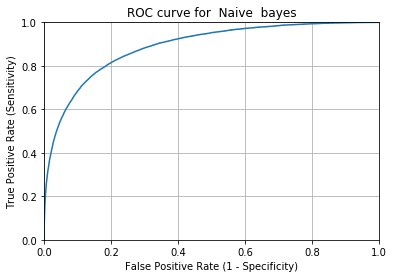

  AUC: 0.889


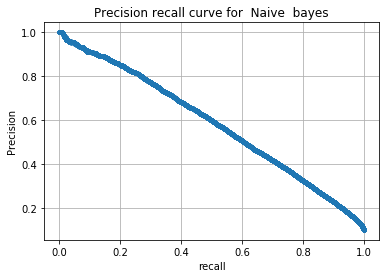

 Precision recall AUC: 0.586


In [63]:
#init naive bayes with best hyper parameter
nb_model =GaussianNB( var_smoothing= 7.847599703514623e-08)
nb_model.fit(X,Y)
confMatrix=run_model(nb_model , X,Y ,"Naive  bayes")


#After selecting best hyperparameter previous and optimised model have all most same accuracy parameter

1. Fnr same 63%
2. Precision recall AUC:  same 89%
3. Fpr same 1 percent
4. Roc_auc score almost same 58%
5. Accuracy same 92%
6. F1 score same 48%
7. Optimed model perform same as base model

# Xgboost

In [65]:
#init xgboost clasifier 
xgb = XGBClassifier(max_depth=1,eta =1)
# fit model
xgb.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

{'precision': 1.0, 'accuracy': 0.89952, 'recall': 9.95123892924669e-05, 'specificity': 1.0, 'fpr': 0.0, 'fnr': 0.9999004876107075, 'f1': 0.0001990049751243781}


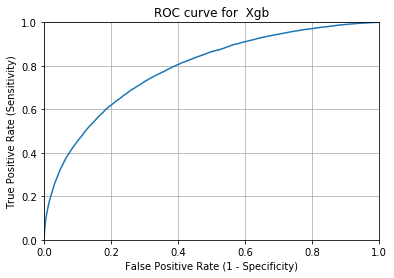

  AUC: 0.788


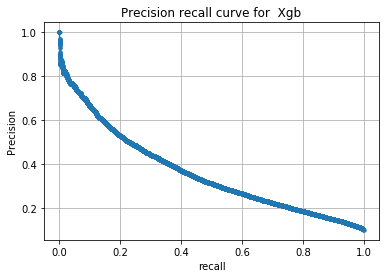

 Precision recall AUC: 0.361


In [66]:
# get model metrics
confMatrix=run_model(xgb , X,Y ,"Xgb")

1. precision 100% 
2. accuracy 90%
3. recall less than 1%
4.fpr 0%
5.fnr 99%
6.f1 score less than 1 %
7.Precision recall AUC: 36%
8.AUC: 79%
9.  false negative rate is very high ,very poor model 

# Hyperparameter tunning 

{'precision': 0.9224158091674463, 'accuracy': 0.97176, 'recall': 0.7850034829336252, 'specificity': 0.992623761825883, 'fpr': 0.00737623817411702, 'fnr': 0.21499651706637476, 'f1': 0.8481802053653029}


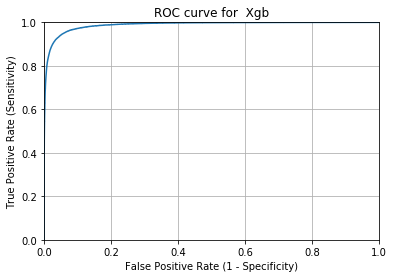

  AUC: 0.988


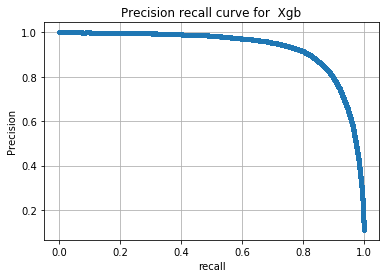

 Precision recall AUC: 0.932


In [67]:
# tuning model
# parmeter used 
#Learning_rate:Makes the model more robust by shrinking the weights on each step
#N_estimators : Number of tree to create 
#Max_depth :Max depth tree is allowed to grow 
#Min_child_weight :Defines the minimum sum of weights of all observations required in a child.
#Gamma :A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
#Subsample:Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree.
#Colsample_bytree:Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree.
#Objective :This defines the loss function to be minimized.
#Scale_pos_weight :A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.

xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=800,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,a
 objective= 'binary:logistic',
 nthread=4,
 seed=27,scale_pos_weight=2)
xgb.fit(X,Y)
confMatrix=run_model(xgb , X,Y ,"Xgb")

In [0]:
logistic_base ={'precision': 0.28493852272933656, 'accuracy': 0.781095, 'recall': 0.7806249378047567, 'specificity': 0.7811475136463185, 'fpr': 0.21885248635368146, 'fnr': 0.2193750621952433, 'f1': 0.41748825822589447}
logistic_opti={'precision': 0.2597749380125882, 'accuracy': 0.74837, 'recall': 0.8132152452980396, 'specificity': 0.7411257240052918, 'fpr': 0.25887427599470825, 'fnr': 0.1867847547019604, 'f1': 0.3937649071240995}
dt_base={'precision': 0.16081314495770407, 'accuracy': 0.669755, 'recall': 0.5419942282814211, 'specificity': 0.6840279707840936, 'fpr': 0.31597202921590645, 'fnr': 0.458005771718579, 'f1': 0.24803324415096492}

dt_opti={'precision': 0.672077922077922, 'accuracy': 0.90004, 'recall': 0.010299532291770325, 'specificity': 0.9994385832286468, 'fpr': 0.0005614167713532923, 'fnr': 0.9897004677082297, 'f1': 0.020288150543957658}
nb_base={'precision': 0.7148252154546335, 'accuracy': 0.921695, 'recall': 0.3673002288784954, 'specificity': 0.9836299763204411, 'fpr': 0.016370023679558872, 'fnr': 0.6326997711215047, 'f1': 0.4852588331963845}

nb_opti={'precision': 0.7148252154546335, 'accuracy': 0.921695, 'recall': 0.3673002288784954, 'specificity': 0.9836299763204411, 'fpr': 0.016370023679558872, 'fnr': 0.6326997711215047, 'f1': 0.4852588331963845}
xgb_base={'precision': 1.0, 'accuracy': 0.89952, 'recall': 9.95123892924669e-05, 'specificity': 1.0, 'fpr': 0.0, 'fnr': 0.9999004876107075, 'f1': 0.0001990049751243781}
xgb_opti={'precision': 0.9406936871100118, 'accuracy': 0.977905, 'recall': 0.8326201612100707, 'specificity': 0.9941356961012107, 'fpr': 0.005864303898789341, 'fnr': 0.16737983878992935, 'f1': 0.8833636867527119}

In [0]:
# creating data frame from all model metrics 
df = pd.DataFrame([logistic_base,logistic_opti,dt_base,dt_opti,nb_base,nb_opti,xgb_base,xgb_opti] ,index=['logit_base','logit_opti' ,'dt_base' ,'dt_opti','nb_base','nb_opti','xgb_base','xgb_opti'] ,columns=['precision' ,'accuracy' ,'recall' ,'specificity','fpr','fnr','f1'])

In [70]:
# sorting by highest f1 score 
df.sort_values(by='f1',ascending =False).sort_values(by='fnr').head(10)

,precision,accuracy,recall,specificity,fpr,fnr,f1
xgb_opti,0.940694,0.977905,0.832620,0.994136,0.005864,0.167380,0.883364
logit_opti,0.259775,0.748370,0.813215,0.741126,0.258874,0.186785,0.393765
logit_base,0.284939,0.781095,0.780625,0.781148,0.218852,0.219375,0.417488
dt_base,0.160813,0.669755,0.541994,0.684028,0.315972,0.458006,0.248033
nb_base,0.714825,0.921695,0.367300,0.983630,0.016370,0.632700,0.485259
nb_opti,0.714825,0.921695,0.367300,0.983630,0.016370,0.632700,0.485259
dt_opti,0.672078,0.900040,0.010300,0.999439,0.000561,0.989700,0.020288
xgb_base,1.000000,0.899520,0.000100,1.000000,0.000000,0.999900,0.000199


# Model selection 
1. Choosing model that has high f1 score 
2.  low false negative rate 
3. High roc_auc
4. low false positive rate 
5. All this criteria is full filled by xg boost 
6. so final model  is xgbboost

In [0]:
# predicting test data 
ypred=xgb.predict(test)
sub_df = pd.DataFrame({"ID_code":test_Id_code_orignal.values})
sub_df["target"] = ypred
sub_df.to_csv("submission_logistic.csv", index=False)
